Lior Baruchovich 203530688
05/07/2021

# all TEST

**If I had unlimited resources and time**

1.   **Q-1: WallStreetBets analysis:**

  *   **A:**

      *   **DATA -** I would use and process a larger number of databases and not just one, in order to work on more comprehensive information and thus achieve better accuracy and results
    
      *   **Top topics analysis of the community by time -** In order to find the most talked about topics in the community and to avoid very popular but unimportant words I would analyze all the texts with **SPACY (1g)** entity identifiers **(when I tried it always crashed)**, then filter by significant topics like stock names, important figures, events Key and the more....

  *   **B:** social media graph
      *   **social media graph** - In building the social media graph, I created the vertices from the post writers and users who commented on them, I created the adges between each post writer and the user who comments to him. I was based on the assumption  that if a person responds to a post it is only to a friend's. **If I had more time and resources** I would gather more informative data and find stronger ties that indicate strongly on friendshipes in the social media.
      *   **Sentiment analysis -** In order to classify each user's post I used an information package called **AFINNE**, **if I had more time and resources** I would build a **neural network** and train it so that it could classify the phobias better and more accurately, this required more time and collecting larger amounts of DATA for training

    *   **D - unusual events in the community:**
        *   I actually identified an anomaly on just **one stock GME** **if I had more time** I would be happy to do what is required on all the most talked about stocks on the social media network and on the top topics too.
        *   In analyzing the anomalies I used a non-correlation between the amount of positive talk about the stock in the social media and the stock value and a non-correlation between the amount of negative talking about the stock in the social media and the falling stock value, **if I had more time** I would be happy to combine overlapping information between different stocks and see how stocks affect each other, this way I would get a broader point of view ,thus getting better and more accurate information.



2.   **Q-2: state of Michigan - COVID-19:**
    *   **A- COVID-19 effect on 3,4 outbreaks:**
        *   I data mining from only one daily news of Michigan state, the "michiganDaily" news website. If i had more time I would combine information and posts fron multiple websites for more comprehensive and reliable data.

    *   **ISRAEL - 3,4 outbreaks comparison to 1,2 outbreaks by the country resources, fuel and electricity:** The comparison between the various outbreaks was made on the field of energy in the **State of Israel**, on the **monthly fuel prices, and on the daily electricity prices**. **If I had more time and resources** I would be happy to combine additional data like water consumption, solar energy, gas consumption and more.
In addition, the information that was available for the most part did not cover the fourth outbreak, since this information has not yet been updated on Israeli government websites, I would be happy to include it in the information analysis as well.



3.   **Q-3: Fake new:**
    *   In this question I created a model that knows how to identify false articles and statements. Now in order to prevent the spread of false news about corona vaccines, you can check a particular article or POST whether it is false or not before publishing it on various websites and social media, thus preventing the spread of false news on the subject
    *   **IF I had more time and recources**, I would like to check it on real life data and post and see if the classification is done correctly and prevents the false news spread.




## data

In [ ]:
!pip install turicreate

In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liorbaruchovich","key":"62c4c441caba1bfa2738494828e1a9bc"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# searching for the dataset
!kaggle datasets list -s wallstreetbets

## **Q-1: WallStreetBets analysis**

### data

In [4]:
!mkdir ./datasets
!mkdir ./datasets/WallStreetBets2

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d mattpodolak/rwallstreetbets-posts-and-comments -p ./datasets/WallStreetBets2/
!unzip ./datasets/WallStreetBets2/*.zip  -d ./datasets/WallStreetBets2

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/WallStreetBets2’: File exists
 99% 894M/900M [00:08<00:00, 105MB/s] 
100% 900M/900M [00:08<00:00, 112MB/s]
Archive:  ./datasets/WallStreetBets2/rwallstreetbets-posts-and-comments.zip
  inflating: ./datasets/WallStreetBets2/wallstreetbets_comments.csv  
  inflating: ./datasets/WallStreetBets2/wallstreetbets_posts.csv  y
y



In [5]:
!ls ./datasets/WallStreetBets2

rwallstreetbets-posts-and-comments.zip	wallstreetbets_posts.csv
wallstreetbets_comments.csv


In [6]:
import turicreate as tc
%matplotlib inline
import time

read all CSV

In [ ]:
#Loading a CSV to SFrame (this can take some time)
reddit_2_comments = tc.SFrame.read_csv("./datasets/WallStreetBets2/wallstreetbets_comments.csv")

In [ ]:
#Loading a CSV to SFrame (this can take some time)
reddit_2_posts = tc.SFrame.read_csv("./datasets/WallStreetBets2/wallstreetbets_posts.csv")

In [9]:
reddit_2_posts_small = reddit_2_posts['author', 'created_utc', 'full_link', 'id', 'selftext', 'title', 'num_comments']  

create date time from the utc info

In [10]:
def get_date(utc_info):
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(utc_info))
    return date

reddit_2_posts_small['date'] = reddit_2_posts_small['created_utc'].apply(lambda s: get_date(s))
reddit_2_posts_small.remove_column('created_utc')

Columns:
	author	str
	full_link	str
	id	str
	selftext	str
	title	str
	num_comments	int
	date	str

Rows: 700879

Data:
+-------------------+-------------------------------+--------+
|       author      |           full_link           |   id   |
+-------------------+-------------------------------+--------+
|    readyrummy1    | https://www.reddit.com/r/w... | kcz0hf |
|     Pluto_Muto    | https://www.reddit.com/r/w... | kcz07r |
|       Hiro08      | https://www.reddit.com/r/w... | kcyzzz |
|    uslashuname    | https://www.reddit.com/r/w... | kcyyw4 |
|  dadwhomstfucks12 | https://www.reddit.com/r/w... | kcyyve |
|  officespace2020  | https://www.reddit.com/r/w... | kcyyo1 |
|     PapaShnob     | https://www.reddit.com/r/w... | kcyy4x |
| whydidilookthatup | https://www.reddit.com/r/w... | kcyxuq |
|  _WinnerTakesAll_ | https://www.reddit.com/r/w... | kcyxlt |
|   BigSlimetime73  | https://www.reddit.com/r/w... | kcyxbk |
+-------------------+-------------------------------+--------+
+-------------------------------+--------------------------------+--------------+
|            selftext           |             title              | num_comments |
+-------------------------------+--------------------------------+--------------+
| 5:30 AM\n\nWoke up five mi... |    Ruled by the Theta Gods     |      6       |
|           [removed]           |       3k and I want more       |      0       |
|                               | Thank you fellow retards a...  |      0       |
|           [removed]           | AZN fair value of $55, pri...  |      0       |
|           [removed]           |    I wanna be less retarded    |      0       |
| # Intro\n\nLet me get soft... |       Motivation Monday        |      9       |
|           [removed]           |        thoughts on pfe?        |      0       |
|                               | Papa Musks Tendies taking ...  |      0       |
|                               | Did you know Elon is a red...  |      11      |
| Hello fellow retards,\n\nT... | Toy Yoda (but the car company) |      4       |
+-------------------------------+--------------------------------+--------------+
+---------------------+
|         date        |
+---------------------+
| 2020-12-14 14:50:30 |
| 2020-12-14 14:50:04 |
| 2020-12-14 14:49:44 |
| 2020-12-14 14:48:02 |
| 2020-12-14 14:48:00 |
| 2020-12-14 14:47:40 |
| 2020-12-14 14:46:49 |
| 2020-12-14 14:46:19 |
| 2020-12-14 14:45:54 |
| 2020-12-14 14:45:27 |
+---------------------+
[700879 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

remove irrelevant dates

In [11]:
def check_date(date_info):
  flag = False
  year = date_info.split('-')[0]
  year = int( year )

  month = date_info.split('-')[1]
  month = int( month )

  day = (date_info.split('-')[2]).split(' ')[0]
  day = int( day )
  
  if year==2021 and ( (month==1 and day>24) or (month==2) ):
    flag =True
    return flag
  else:
    return flag

In [12]:
reddit_2_posts_small['test'] = reddit_2_posts_small['date'].apply( lambda x: check_date(x) ) 

In [13]:
reddit_2_posts_small = reddit_2_posts_small[ reddit_2_posts_small['test']==1]

In [14]:
reddit_2_posts_small = reddit_2_posts_small.remove_column('test')

comments csv 

In [15]:
reddit_2_comments_small = reddit_2_comments['author', 'body', 'created_utc', 'id', 'parent_id']

In [16]:
def get_date(utc_info):
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(utc_info))
    return date

reddit_2_comments_small['date'] = reddit_2_comments_small['created_utc'].apply(lambda s: get_date(s))
reddit_2_comments_small.remove_column('created_utc')

Columns:
	author	str
	body	str
	id	str
	parent_id	str
	date	str

Rows: 4636087

Data:
+----------------------+--------------------------------+---------+------------+
|        author        |              body              |    id   | parent_id  |
+----------------------+--------------------------------+---------+------------+
|    guesswhatihate    |            #DIPPING            | gftdfol | t1_gftdcb8 |
|      k12nmonky       |        NIO and SPCE ftw        | gftdfo4 | t1_gftdc1s |
|      tnmtnmtnm       |              Flat              | gftdfo3 | t1_gftdbth |
|   everlastingdeath   | Lol what happened to the l...  | gftdfnp | t3_kcvkwx  |
|     ZakkuTurner      |       Jan 22 2021, 40.5        | gftdfmf | t1_gftddng |
|   Neither_Meat8226   |    SPCE bounce back by EOD?    | gftdfk8 | t3_kcvkwx  |
|     gordonopolis     |          Nice! Thanks          | gftdfif | t1_gftcq92 |
| Environmental_Youth6 | My sex life would like to ...  | gftdfh0 | t1_gftd073 |
|   Bonkerz4Stonkerz   |     Well that was a given      | gftdffp | t1_gftdbui |
|        ASuag         | This was very gay, but thanks. | gftdfek | t3_kcvkwx  |
+----------------------+--------------------------------+---------+------------+
+---------------------+
|         date        |
+---------------------+
| 2020-12-14 14:51:22 |
| 2020-12-14 14:51:22 |
| 2020-12-14 14:51:22 |
| 2020-12-14 14:51:21 |
| 2020-12-14 14:51:21 |
| 2020-12-14 14:51:20 |
| 2020-12-14 14:51:19 |
| 2020-12-14 14:51:19 |
| 2020-12-14 14:51:18 |
| 2020-12-14 14:51:18 |
+---------------------+
[4636087 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [17]:
reddit_2_comments_small['test'] = reddit_2_comments_small['date'].apply( lambda x: check_date(x) ) 

In [18]:
reddit_2_comments_small = reddit_2_comments_small[ reddit_2_comments_small['test']==1]

In [19]:
reddit_2_comments_small = reddit_2_comments_small.remove_column('test')

In [20]:
def split_date(date_info):
  final_d = date_info.split(' ')[0]
  return final_d

In [21]:
reddit_2_comments_small['dates_final'] = reddit_2_comments_small['date'].apply( lambda x: split_date(x) ) 
reddit_2_comments_small = reddit_2_comments_small.remove_column('created_utc')
reddit_2_comments_small = reddit_2_comments_small.remove_column('date')

In [22]:
reddit_2_posts_small['dates_final'] = reddit_2_posts_small['date'].apply( lambda x: split_date(x) ) 
reddit_2_posts_small = reddit_2_posts_small.remove_column('created_utc')
reddit_2_posts_small = reddit_2_posts_small.remove_column('date')

In [23]:
reddit_2_comments_small.save('/home/comments_small', format='csv')

In [ ]:
reddit_2_posts_small.save('/home/posts_small', format='csv')

### **A -** 

*   **Top topics analysis of the community by time**
*   **correlation between stock talk amount in the media and the stock market value**



In [ ]:
!pip install spaCy
!pip install nltk

In [25]:
import turicreate as tc
%matplotlib inline
import time

In [ ]:
import nltk
import turicreate as tc
from nltk.tokenize import word_tokenize
nltk.download('punkt') # need to download punkt package from NLTK


from collections import Counter
import re

In [ ]:
reddit_2_posts_small = tc.SFrame.read_csv("/content/datasets/posts_small.csv")

In [ ]:
reddit_2_comments_small = tc.SFrame.read_csv("/content/datasets/comments_small.csv")

#### **Create list of most common topics of the month**

remove empji from text

In [44]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [45]:
reddit_2_posts_small['title'] = reddit_2_posts_small['title'].apply( lambda x: deEmojify(x) ) 

In [ ]:
reddit_2_comments_small.save('/home/comments_noEmoji', format='csv')
reddit_2_posts_small.save('/home/posts_noEmoji', format='csv')

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

for every day create bag of word from all daiky titles

In [47]:
def title_to_topics_list(num_title):
  title = num_title.lower()
  #remove marks
  re_words = re.compile(r"(\w+)")
  words_list = re_words.findall(title)

  #words_list = word_tokenize(title)
  #remove stop word
  stop_words_set = set(stopwords.words("english"))
  words_list = [w for w in words_list if w not in stop_words_set]
  return words_list
 

In [48]:
reddit_2_posts_small['top_topics_bag'] = reddit_2_posts_small['title'].apply( lambda x: title_to_topics_list(x) ) 

**find out who are the most common topics of the month**

In [49]:
df_posts = reddit_2_posts_small.to_dataframe()

In [51]:
df_posts

author  ...                                     top_topics_bag
0       Critical-Special5654  ...                            [nokia, catch, bb, gme]
1               vaultguru123  ...  [gme, moon, know, big, yolo, make, minimum, wa...
2               Indigo_smoke  ...                                        [bb, pluto]
3                RejectKid89  ...  [alright, boys, bb, need, pay, student, loans,...
4                parkerfudge  ...  [name, parker, mudge, like, say, fuck, jake, f...
...                      ...  ...                                                ...
624429            westtownie  ...                      [wsb, currently, attack, sos]
624430            Lucid_Duck  ...                                         [ode, wsb]
624431            ml-the-one  ...                                            [bannt]
624432               Riotcha  ...                             [make, hedgefond, win]
624433  Intelligent-Carpet57  ...            [hedgies, admins, wsb, right, nio, rip]

[624434 rows x 8 columns]

In [52]:
type(df_posts)

pandas.core.frame.DataFrame

In [ ]:
all_tops_dic = {}

for index, row in df_posts.iterrows():
   top_list = row['top_topics_bag']
   for word in top_list:
     if word in all_tops_dic:
       all_tops_dic[word] = all_tops_dic[word]+1
     else:
       all_tops_dic[word] = 1

In [ ]:
c = Counter(all_tops_dic)
top_topics_list = c.most_common(10)

In [ ]:
top_topics_dic_Total = {}
for per in top_topics_list:
  key1 = str(per).split('\'')[1]
  key = key1.split('\'')[0]
  value = str(per).split(' ')[1]
  value = str(value).split(')')[0]
  top_topics_dic_Total[key] = value


In [ ]:
top_topics_dic_Total

#### **data preperation**

In [ ]:
import turicreate.aggregate as agg

In [ ]:
post_sf_by_day = reddit_2_posts_small.groupby("dates_final",{"all_daliy_posts":agg.CONCAT("title")})

In [ ]:
post_sf_by_day

**create bag of word of all daily titles**

In [ ]:
def title_to_topics_list2(title_list):
  words_list_total = []
  for title in title_list:
    #remove marks
    title = title.lower()
    re_words = re.compile(r"(\w+)")
    words_list = re_words.findall(title)
    #remove stop word
    stop_words_set = set(stopwords.words("english"))
    words_list = [w for w in words_list if w not in stop_words_set]
    words_list_total.extend(words_list)
  return words_list_total

In [ ]:
post_sf_by_day['topics_bag'] = post_sf_by_day['all_daliy_posts'].apply( lambda x: title_to_topics_list2(x) ) 

In [ ]:
post_sf_by_day2 = post_sf_by_day.remove_column('all_daliy_posts')

In [ ]:
def create_dic_from_topic_list2(topic_list, total_top):
  print(total_top)
  all_tops_dic = {}
  for topic in topic_list:
      if topic in all_tops_dic:
        all_tops_dic[topic] = all_tops_dic[topic]+1
      else:
        all_tops_dic[topic] = 1

  c = Counter(all_tops_dic)
  top_topics = c.most_common(10) # top commons topic for that day!!!!!!!!!!
  print(top_topics)

  top_topics_dic_final = {}
  for d_topic in top_topics:
    d_topic_2 = str(d_topic).split('\'')[1]
    print(d_topic_2)
    # d_topic_3 = str(d_topic_2).split('\'')[1]
    # print(d_topic_3)
    d_amount = str(d_topic).split(' ')[1]
    d_amount2 = str(d_amount).split(')')[0]
    
    print(d_amount2)
    if d_topic_2 in total_top:
      top_topics_dic_final[d_topic_2] = d_amount2

  return top_topics_dic_final

**create dictionary of top daily topics**

In [ ]:
dic_top_topics = top_topics_dic_Total
post_sf_by_day['top_topics_dic'] = post_sf_by_day['topics_bag'].apply( lambda x: create_dic_from_topic_list2(x, dic_top_topics) ) 

In [ ]:
post_sf_by_day_onlyDic = post_sf_by_day.remove_column('all_daliy_posts')
post_sf_by_day_onlyDic = post_sf_by_day_onlyDic.remove_column('topics_bag')

In [ ]:
post_sf_by_day_onlyDic.save('/content/datasets/postDicofEday', format='csv')

In [ ]:
post_sf_by_day_onlyDic

In [ ]:
post_onlyDic_df = post_sf_by_day_onlyDic.to_dataframe()

In [ ]:
post_onlyDic_df

#### **show topics popularity over time**

In [55]:
import pandas as pd
topic_amount_of_EveryDay = pd.DataFrame({'Date': ['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
                                                  '2021-01-30	','2021-01-31','2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04'],
                                 'amc': [570,0,7944,14668,8626,4005,3456,8387,8712,3233,108],
                                 'gme': [3700,1941,10332,28102,15706,8380,7635,13312,14525,8527,301],
                                 'buy': [899,380,4491,16596,10705,3581,2922,6752,7915,2391,77],
                                 'nok': [649,545,6903,7100,0,0,0,0,0,0,0],
                                 'like': [0,0,0,0,0,1912,1774,2783,0,1216,100],
                                 'moon': [1064,562,3824,6153,5101,1946,1900,3679,2752,1659,76] })

In [56]:
topic_amount_of_EveryDay

Date    amc    gme    buy   nok  like  moon
0     2021-01-25    570   3700    899   649     0  1064
1     2021-01-26      0   1941    380   545     0   562
2     2021-01-27   7944  10332   4491  6903     0  3824
3     2021-01-28  14668  28102  16596  7100     0  6153
4     2021-01-29   8626  15706  10705     0     0  5101
5   2021-01-30\t   4005   8380   3581     0  1912  1946
6     2021-01-31   3456   7635   2922     0  1774  1900
7     2021-02-01   8387  13312   6752     0  2783  3679
8     2021-02-02   8712  14525   7915     0     0  2752
9     2021-02-03   3233   8527   2391     0  1216  1659
10    2021-02-04    108    301     77     0   100    76

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


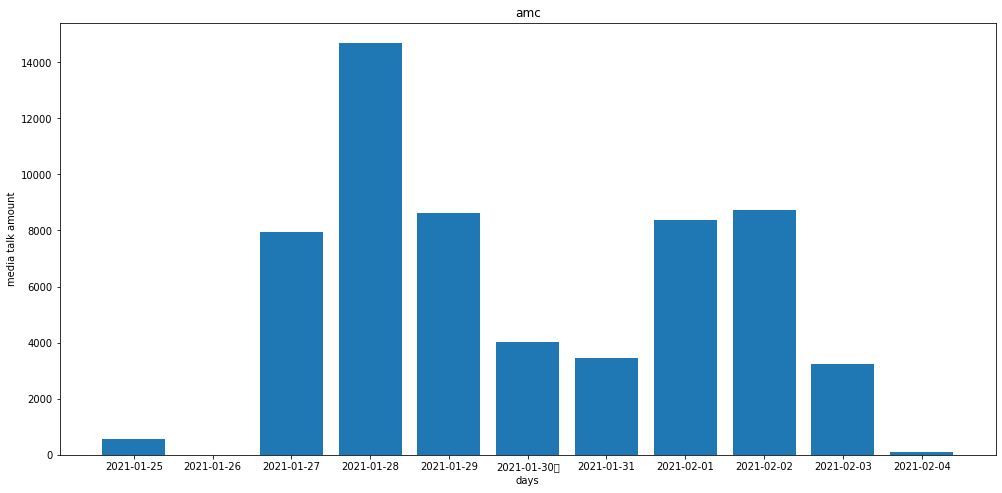

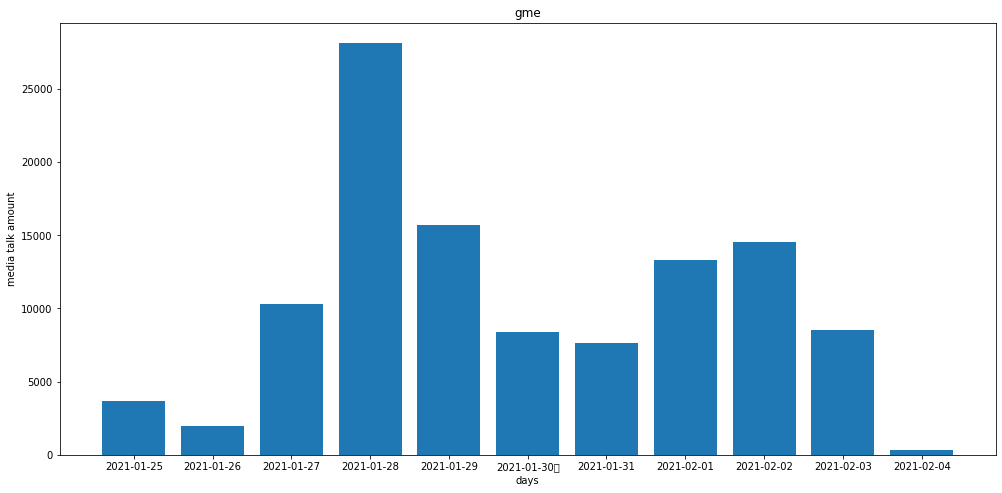

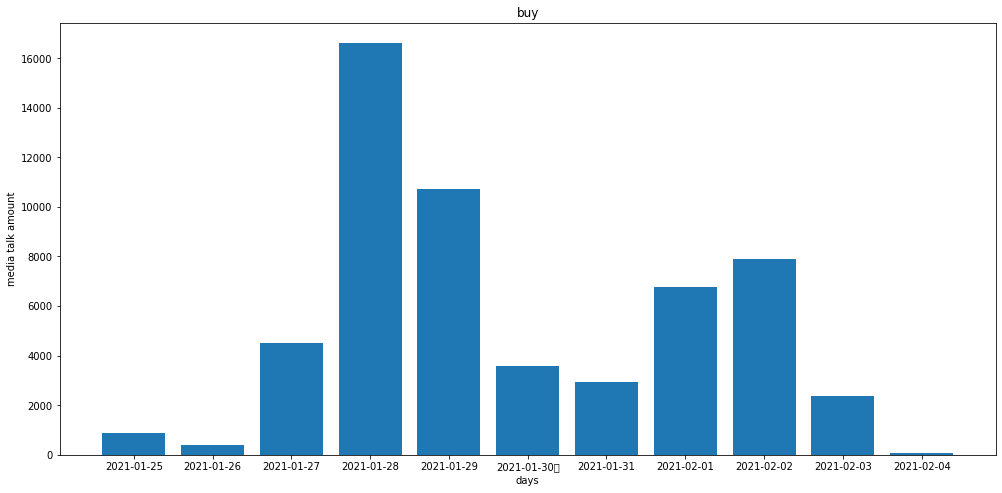

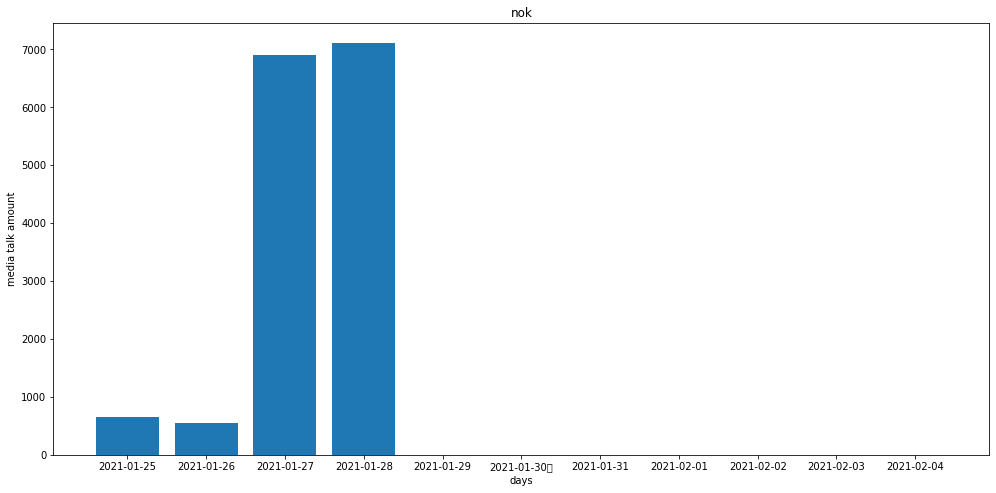

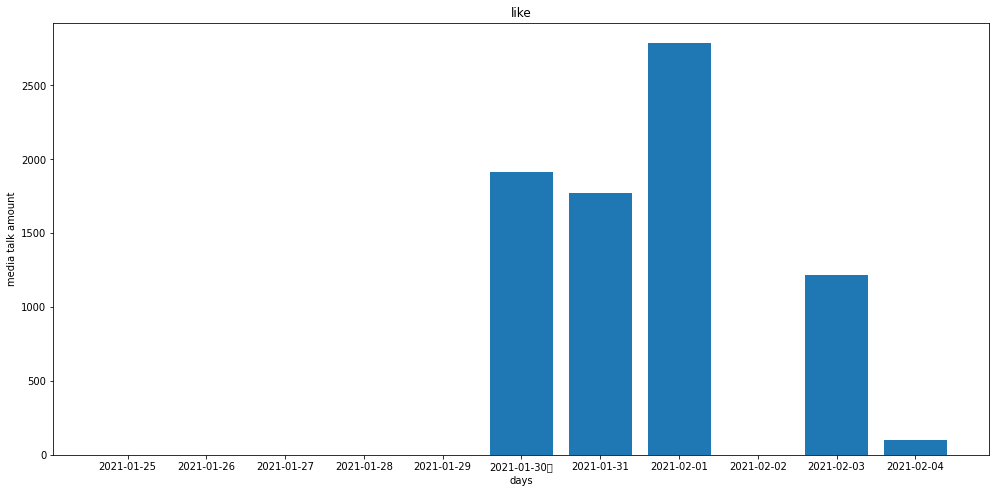

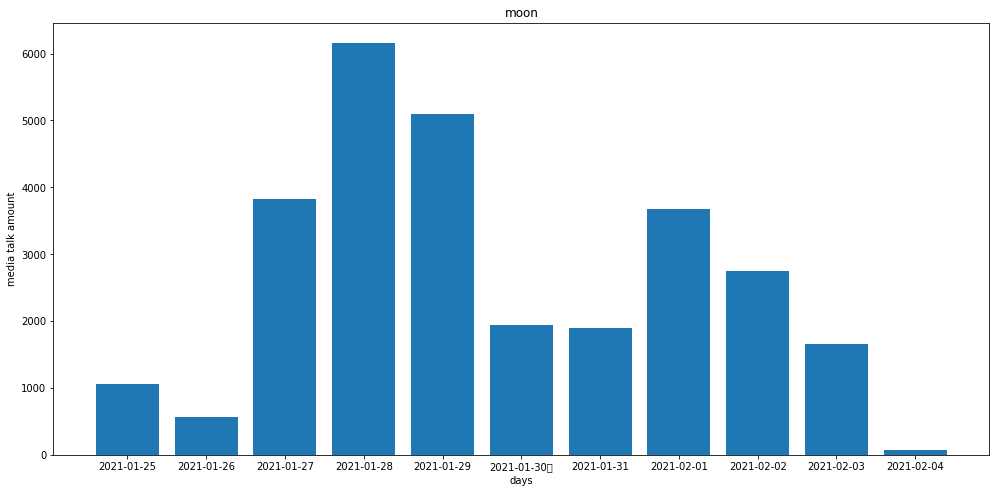

In [57]:
import matplotlib.pyplot as plt

days = ['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
        '2021-01-30	','2021-01-31','2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04']
topics_names = ['amc', 'gme', 'buy', 'nok', 'like', 'moon']

for stock_num in range(6):
  fig, ax = plt.subplots()
  fig.set_size_inches(13,6)
  # fig = plt.figure(4,8)

  ax = fig.add_axes([0,0,1,1])
  x_val = days

  stockName = topics_names[stock_num]
  y_val = topic_amount_of_EveryDay[stockName]

  ax.bar(x_val,y_val)
  plt.xlabel('days')
  plt.ylabel('media talk amount')
  plt.title(stockName)
  plt.show()

#### **show coraletion of the GME stock over time by stock price at end of day and the amount of talk in the media** (using YFINANCE)

In [ ]:
!pip install yfinance

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
stock_info_tst = yf.download('like', start='2021-01-25', end='2021-02-28',  progress=False)
stock_info_tst = stock_info_tst['Close']
stock_info_tst

In [246]:
stock_info_gme = yf.download('gme', start='2021-01-25', end='2021-02-28',  progress=False)
stock_info_gme = stock_info_gme['Close']
stock_info_gme

Date
2021-01-25     76.790001
2021-01-26    147.979996
2021-01-27    347.510010
2021-01-28    193.600006
2021-01-29    325.000000
2021-02-01    225.000000
2021-02-02     90.000000
2021-02-03     92.410004
2021-02-04     53.500000
2021-02-05     63.770000
2021-02-08     60.000000
2021-02-09     50.310001
2021-02-10     51.200001
2021-02-11     51.099998
2021-02-12     52.400002
2021-02-16     49.509998
2021-02-17     45.939999
2021-02-18     40.689999
2021-02-19     40.590000
2021-02-22     46.000000
2021-02-23     44.970001
2021-02-24     91.709999
2021-02-25    108.730003
2021-02-26    101.739998
Name: Close, dtype: float64

In [62]:
GME_EvDay_amount = pd.DataFrame({'Date': ['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
                                          '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04'],
                                 'stock_close': [76, 147, 347, 193, 325, 225, 90, 92, 53],
                                 'talk_amount': [3700, 1941, 10332, 28102, 15706, 13312, 14525, 5827, 301]})

In [245]:
GME_EvDay_amount

Date  stock_close  talk_amount
0  2021-01-25           76         3700
1  2021-01-26          147         1941
2  2021-01-27          347        10332
3  2021-01-28          193        28102
4  2021-01-29          325        15706
5  2021-02-01          225        13312
6  2021-02-02           90        14525
7  2021-02-03           92         5827
8  2021-02-04           53          301

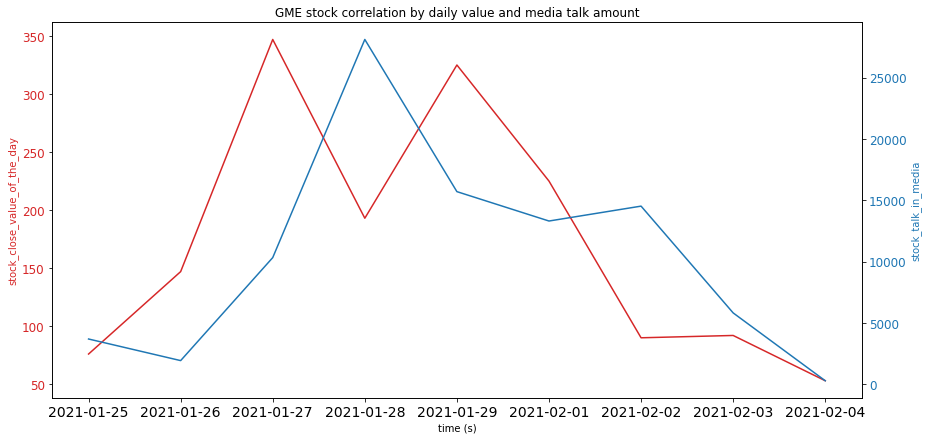

In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
data1 = GME_EvDay_amount['stock_close']
data2 = GME_EvDay_amount['talk_amount']
time = GME_EvDay_amount['Date']

fig, ax1 = plt.subplots()
fig.set_size_inches(13,6)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('stock_close_value_of_the_day', color=color)
ax1.plot(time, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock_talk_in_media', color=color)  # we already handled the x-label with ax1
ax2.plot(time, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('GME stock correlation by daily value and media talk amount')
plt.show()

### **B - social media graph**

#### data - join csv post and post comments

In [66]:
import networkx as nx
import turicreate as tc

post

In [ ]:
#Loading a CSV to SFrame (this can take some time)
reddit_posts = tc.SFrame.read_csv("./datasets/WallStreetBets2/wallstreetbets_posts.csv")

In [68]:
posts_B_small = reddit_posts['author', 'id', 'selftext', 'title', 'num_comments'] 

comments

In [ ]:
#Loading a CSV to SFrame (this can take some time)
reddit_comments = tc.SFrame.read_csv("./datasets/WallStreetBets2/wallstreetbets_comments.csv")

In [70]:
comments_B_small = reddit_comments['author', 'body', 'id', 'parent_id']

In [71]:
def correct_p_id(p_id):
  id = p_id
  id = id.split('_')[1]
  return id

In [72]:
#delete all prefixes t3 t1
comments_B_small['parent_id'] = comments_B_small['parent_id'].apply( lambda x: correct_p_id(x) ) 

In [73]:
comments_B_small['id'] = comments_B_small['parent_id']
comments_B_small['author_c'] = comments_B_small['author']

In [74]:
comments_B_small = comments_B_small.remove_column('parent_id')

In [75]:
comments_B_small = comments_B_small.remove_column('author')

In [76]:
post_and_comments = posts_B_small.join(comments_B_small, on='id', how='inner')

In [248]:
post_and_comments

Columns:
	author	str
	id	str
	selftext	str
	title	str
	num_comments	int
	body	str
	author_c	str

Rows: 1592266

Data:
+---------------+--------+-------------------------------+
|     author    |   id   |            selftext           |
+---------------+--------+-------------------------------+
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
| AutoModerator | kcvkwx | Your daily trading discuss... |
+---------------+--------+-------------------------------+
+-------------------------------+--------------+--------------------------------+
|             title             | num_comments |              body              |
+-------------------------------+--------------+--------------------------------+
| Daily Discussion Thread fo... |    24853     | Lol what happened to the l...  |
| Daily Discussion Thread fo... |    24853     | Lol what happened to the l...  |
| Daily Discussion Thread fo... |    24853     |    SPCE bounce back by EOD?    |
| Daily Discussion Thread fo... |    24853     |    SPCE bounce back by EOD?    |
| Daily Discussion Thread fo... |    24853     | This was very gay, but thanks. |
| Daily Discussion Thread fo... |    24853     | This was very gay, but thanks. |
| Daily Discussion Thread fo... |    24853     | Buying lazr here might be ...  |
| Daily Discussion Thread fo... |    24853     | Buying lazr here might be ...  |
| Daily Discussion Thread fo... |    24853     | This a reminder - Donnie h...  |
| Daily Discussion Thread fo... |    24853     | This a reminder - Donnie h...  |
+-------------------------------+--------------+--------------------------------+
+------------------+
|     author_c     |
+------------------+
| everlastingdeath |
| everlastingdeath |
| Neither_Meat8226 |
| Neither_Meat8226 |
|      ASuag       |
|      ASuag       |
|     jukito1      |
|     jukito1      |
|      zobger      |
|      zobger      |
+------------------+
[1592266 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

#### create social media network from the data - posts csv and post comments csv **and find the top 500 users**

In [39]:
social_graph = nx.Graph() # Creating Undirected Graph

In [40]:
%%timeit

post_author_names = post_and_comments['author'].unique()        #### all posts author names
comments_author_names = post_and_comments['author_c'].unique()  #### all comments author names

# create nodes from all names
for po_name in post_author_names:
  social_graph.add_node(po_name)

for com_name in comments_author_names:
  social_graph.add_node(po_name)

# create edges from all combo of post author names and comments author names    
for row in post_and_comments:
    social_graph.add_edge( row['author'], row['author_c'])

1 loop, best of 5: 21.6 s per loop


In [41]:
print(nx.info(social_graph))

Name: 
Type: Graph
Number of nodes: 313785
Number of edges: 712231
Average degree:   4.5396


In [42]:
def getKey(item):
  return item[1]

**social top 500 users**

In [78]:
import operator
social_graph_degree = social_graph.degree()
social_graph_all_degree_sort = sorted(dict(social_graph_degree).items(), key=operator.itemgetter(1), reverse=True)
social_grap_top_500_users = social_graph_all_degree_sort[:500]

#### top 500 user of the network - sum of posts

In [ ]:
social_grap_top_500_users

In [80]:
posts_B_small

Columns:
	author	str
	id	str
	selftext	str
	title	str
	num_comments	int

Rows: 700879

Data:
+-------------------+--------+-------------------------------+
|       author      |   id   |            selftext           |
+-------------------+--------+-------------------------------+
|    readyrummy1    | kcz0hf | 5:30 AM\n\nWoke up five mi... |
|     Pluto_Muto    | kcz07r |           [removed]           |
|       Hiro08      | kcyzzz |                               |
|    uslashuname    | kcyyw4 |           [removed]           |
|  dadwhomstfucks12 | kcyyve |           [removed]           |
|  officespace2020  | kcyyo1 | # Intro\n\nLet me get soft... |
|     PapaShnob     | kcyy4x |           [removed]           |
| whydidilookthatup | kcyxuq |                               |
|  _WinnerTakesAll_ | kcyxlt |                               |
|   BigSlimetime73  | kcyxbk | Hello fellow retards,\n\nT... |
+-------------------+--------+-------------------------------+
+--------------------------------+--------------+
|             title              | num_comments |
+--------------------------------+--------------+
|    Ruled by the Theta Gods     |      6       |
|       3k and I want more       |      0       |
| Thank you fellow retards a...  |      0       |
| AZN fair value of $55, pri...  |      0       |
|    I wanna be less retarded    |      0       |
|       Motivation Monday        |      9       |
|        thoughts on pfe?        |      0       |
| Papa Musks Tendies taking ...  |      0       |
| Did you know Elon is a red...  |      11      |
| Toy Yoda (but the car company) |      4       |
+--------------------------------+--------------+
[700879 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [81]:
import turicreate.aggregate as agg

In [82]:
posts_B_g_by_user = posts_B_small.groupby("author",{"sum_comments":agg.SUM("num_comments")})

In [83]:
posts_B_g_by_user_only = posts_B_g_by_user[ posts_B_g_by_user['sum_comments']>900]

In [249]:
posts_B_g_by_user_only

Columns:
	author	str
	sum_comments	int

Rows: 498

Data:
+----------------------+--------------+
|        author        | sum_comments |
+----------------------+--------------+
|       bhatdinu       |     1360     |
|      blthmsphlp      |     2341     |
|      Lakersland      |     4205     |
|      gariepy13       |     994      |
| Puzzleheaded-Air9290 |     3332     |
|       Hundhaus       |     1453     |
|       jjalaj30       |    15997     |
|   Yabberdabberdooo   |     1386     |
|    TheAmeritrader    |     1663     |
|       hyssop_        |     4939     |
+----------------------+--------------+
[498 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [85]:
len(posts_B_g_by_user_only)

498

#### top 500 user of the network - **sentiment analysis**

##### data -dataframe of post for the top 500 user in the media

In [86]:
social_grap_top_500_users_onlyNames = []
for tuple_u in social_grap_top_500_users:
  social_grap_top_500_users_onlyNames.append(tuple_u[0])

In [87]:
posts_B_only_top500 = posts_B_small

In [88]:
posts_B_only_top500_df = posts_B_only_top500.to_dataframe()

only post of the top 500 author of the social media graph

In [89]:
posts_B_only_top500_df = posts_B_only_top500_df[ posts_B_only_top500_df['author'].isin( social_grap_top_500_users_onlyNames )]

In [90]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [91]:
posts_B_only_top500_df['title'] = posts_B_only_top500_df['title'].apply( lambda x: deEmojify(x) ) 

In [92]:
posts_B_only_top500_df = posts_B_only_top500_df[ posts_B_only_top500_df['author'] != '[deleted]' ]

##### **afinn use for sentiment**

*   use afinn for title sentiment score
*   find amount of positive and negative title of each user



In [ ]:
!pip install afinn

In [94]:
from afinn import Afinn
afinn = Afinn()

In [95]:
posts_B_only_top500_df['afinn_score'] = posts_B_only_top500_df['title'].apply(lambda t: afinn.score(t)) #create score for each title

In [96]:
posts_B_only_top500_df = posts_B_only_top500_df[posts_B_only_top500_df['afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [97]:
def label2sentiment(label):
    if label >= 1:
        return "Positive"
    else:
        return "Negative"

In [98]:
posts_B_only_top500_df['sentiment'] = posts_B_only_top500_df['afinn_score'].apply(lambda label: label2sentiment(label))

In [99]:
posts_B_only_top500_df

author      id  ... afinn_score sentiment
36              aQne72yYGsNC  kcydwj  ...        -4.0  Negative
239              MedtnerOp27  kgsvlh  ...        -1.0  Negative
240              MedtnerOp27  kgsvd5  ...        -1.0  Negative
246            danielbauwens  kgsl8r  ...         2.0  Positive
316     Bright_Percentage_39  kwhr07  ...        -2.0  Negative
...                      ...     ...  ...         ...       ...
700732  Acceptable_Wishbone7  khqpkg  ...         1.0  Positive
700746              quantkim  khql7q  ...         3.0  Positive
700748            dhiral1994  khqju9  ...         2.0  Positive
700787     PencesElectrician  khq0i3  ...         2.0  Positive
700810      SnooMacarons1548  khpow7  ...        -1.0  Negative

[3073 rows x 7 columns]

In [100]:
import turicreate as tc
posts_B_only_top500_sf = tc.SFrame(posts_B_only_top500_df)

In [ ]:
posts_B_only_top500_sf

In [102]:
posts_afinn_score_byUser = posts_B_only_top500_sf.groupby( ['author','sentiment'] ,{"sentiment_sum":agg.COUNT() } )

In [250]:
posts_afinn_score_byUser

Columns:
	author	str
	sentiment	str
	sentiment_sum	int

Rows: 702

Data:
+--------------------+-----------+---------------+
|       author       | sentiment | sentiment_sum |
+--------------------+-----------+---------------+
| The-Legend-Of-Chaw |  Negative |       2       |
|  PubertEHumphrey   |  Positive |       38      |
|      vrweensy      |  Positive |       1       |
|    punkmaster69    |  Positive |       4       |
|     Freemangoo     |  Negative |       31      |
|    mostwant3d1     |  Positive |       14      |
|     caverypca      |  Negative |       2       |
|      ephyfish      |  Positive |       1       |
|    vitocorlene     |  Negative |       4       |
|      Fujit0ra      |  Positive |       1       |
+--------------------+-----------+---------------+
[702 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

##### **find user with highest AVG positive and negative posts**

In [104]:
posts_AVG_afinn_score_byUser = posts_B_only_top500_sf.groupby( ['author'] ,{"sentiment_sum":agg.SUM('afinn_score') } )

In [105]:
posts_AVG_afinn_score_byUser

Columns:
	author	str
	sentiment_sum	float

Rows: 437

Data:
+----------------------+---------------+
|        author        | sentiment_sum |
+----------------------+---------------+
|     bossboss2020     |     -18.0     |
|      blthmsphlp      |      -4.0     |
|      Lakersland      |      0.0      |
| Puzzleheaded-Air9290 |      6.0      |
|       Hundhaus       |      5.0      |
|    quan42069quan     |      -5.0     |
|       jjalaj30       |      1.0      |
|   Yabberdabberdooo   |     -12.0     |
|    TheAmeritrader    |      24.0     |
|       hyssop_        |      -4.0     |
+----------------------+---------------+
[437 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [106]:
print("user with the lowest score is Extracrispytendies with: " + str(posts_AVG_afinn_score_byUser['sentiment_sum'].max()) )
print("user with the lowest score is Xanthony with: " + str(posts_AVG_afinn_score_byUser['sentiment_sum'].min()) )

user with the lowest score is Extracrispytendies with: 87.0
user with the lowest score is Xanthony with: -103.0


#### **Draw the resolts**

##### **Draw 1 - the social network graph** ( main subgraph 0

In [237]:
# let's create a list with nodes that have degree > 1
selected_nodes_list = [n for n,d in dict(social_graph_degree).items() if d >30]
# create a subgraph with only nodes from the above list
sub_social_graph = social_graph.subgraph(selected_nodes_list)
print(nx.info(sub_social_graph))

Name: 
Type: Graph
Number of nodes: 4210
Number of edges: 57690
Average degree:  27.4062


find communities of the social graph

In [238]:
from networkx.algorithms.community import greedy_modularity_communities
communities_all = greedy_modularity_communities(sub_social_graph) # this can take some time
len(communities_all)

35

(array([32.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([1.0000e+00, 1.8780e+02, 3.7460e+02, 5.6140e+02, 7.4820e+02,
        9.3500e+02, 1.1218e+03, 1.3086e+03, 1.4954e+03, 1.6822e+03,
        1.8690e+03]),
 <a list of 10 Patch objects>)

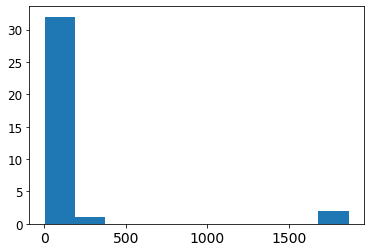

In [239]:
import matplotlib.pyplot as plt
community_size_list = [len(communitie) for communitie in communities_all]
plt.hist(community_size_list)

In [241]:
selected_community_list = [communitie for communitie in communities_all if 300 > len(communitie) > 80]
len(selected_community_list)

1

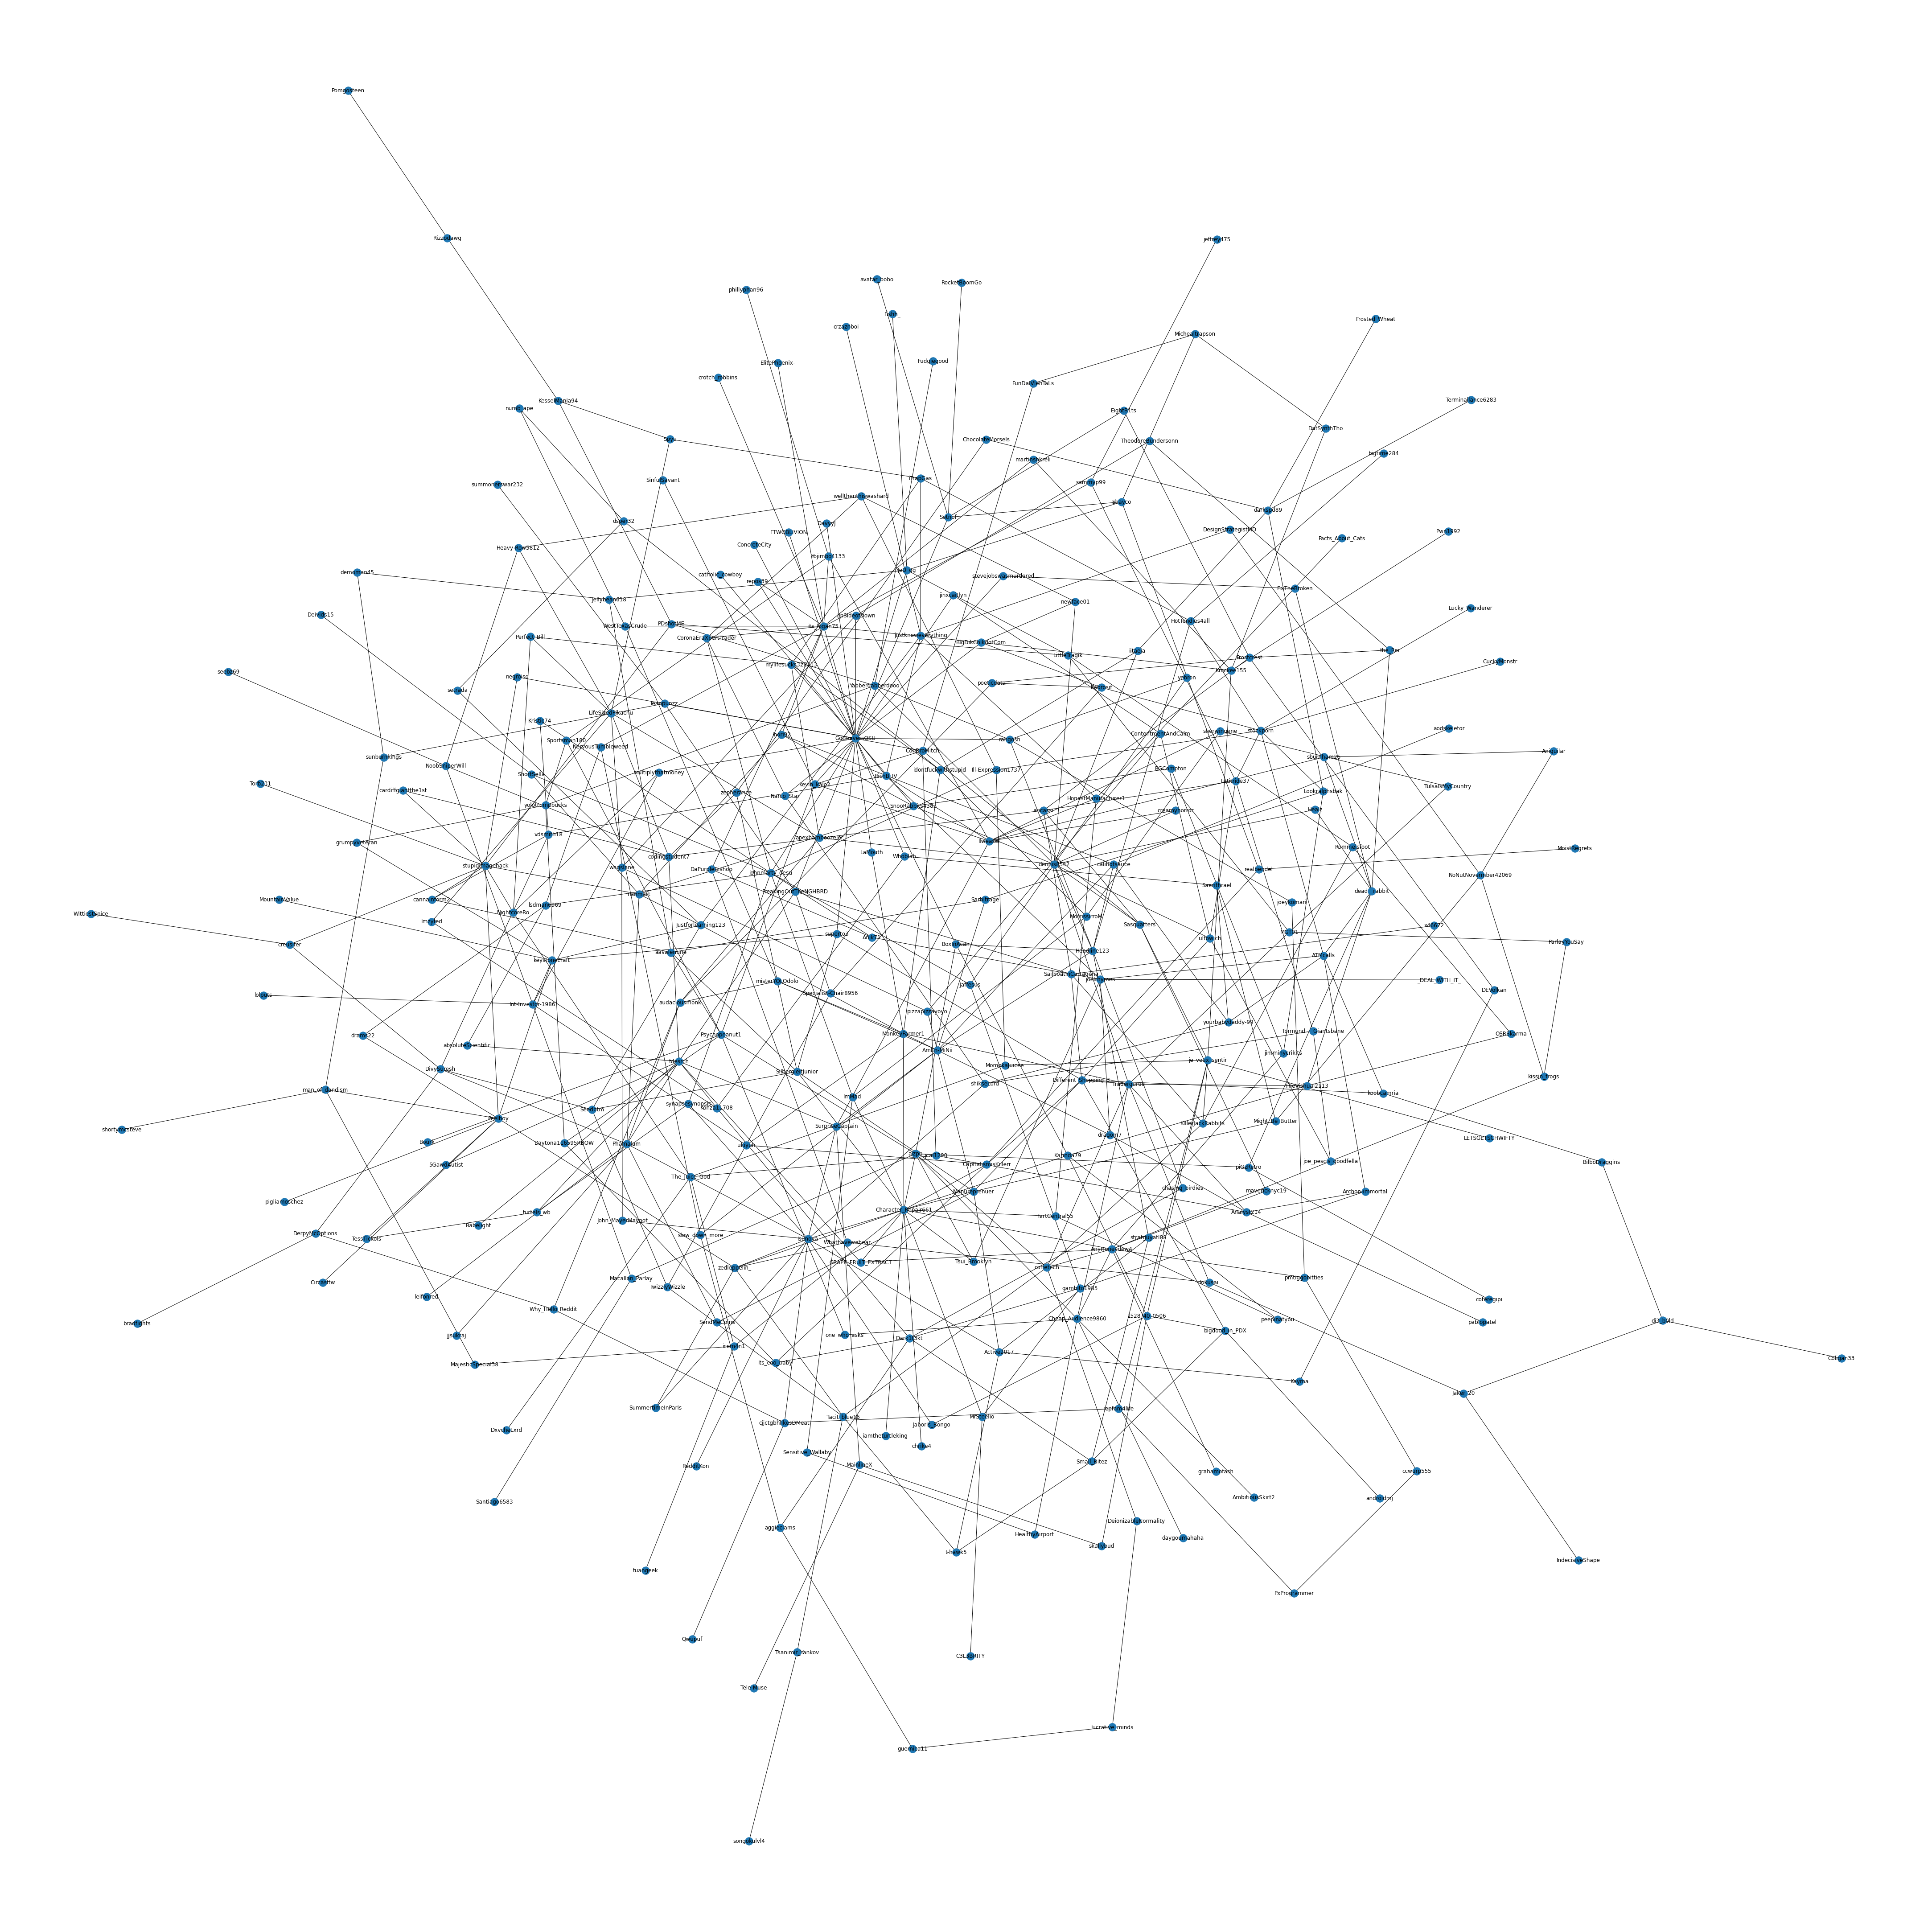

In [244]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,60))
sub_G1 = sub_social_graph.subgraph(selected_community_list[0])
nx.info(sub_G1)
nx.draw_kamada_kawai(sub_G1, with_labels=True)

##### **draw 2 - top 500 main users of the social media - post distribution**

**It can be seen that there are a limited number of key users in the graph with over 15,000 post and with a maximum of 1891582 post !!!, and that most of the major users on the network with a range of between 900 to 2500 posts.**

In [128]:
# the user with the most posts
sum_comments_set = posts_B_g_by_user_only['sum_comments']
sum_comments_list = list(sum_comments_set)
max_val = max(sum_comments_list)
min_val = min(sum_comments_list)
print(max_val)

1891582


In [129]:
posts_B_g_by_user_only_small = posts_B_g_by_user_only.copy()

In [130]:
posts_B_g_by_user_only_small = posts_B_g_by_user_only_small[ posts_B_g_by_user_only_small['sum_comments'] < 15000]

In [131]:
def norm_sum(score, max_val, min_val):
  norm_score = (score-min_val) / (max_val-min_val)
  return int(norm_score*10000)

normalized the values

In [132]:
sum_comments_set = posts_B_g_by_user_only_small['sum_comments']
sum_comments_list = list(sum_comments_set)
max_val = max(sum_comments_list)
min_val = min(sum_comments_list)
posts_B_g_by_user_only_small['norm_sum_comments'] =  posts_B_g_by_user_only_small['sum_comments'].apply( lambda x: norm_sum(x, max_val, min_val) )

In [133]:
posts_B_g_by_user_only_small

Columns:
	author	str
	sum_comments	int
	norm_sum_comments	int

Rows: 476

Data:
+----------------------+--------------+-------------------+
|        author        | sum_comments | norm_sum_comments |
+----------------------+--------------+-------------------+
|       bhatdinu       |     1360     |        366        |
|      blthmsphlp      |     2341     |        1154       |
|      Lakersland      |     4205     |        2650       |
|      gariepy13       |     994      |         73        |
| Puzzleheaded-Air9290 |     3332     |        1949       |
|       Hundhaus       |     1453     |        441        |
|   Yabberdabberdooo   |     1386     |        387        |
|    TheAmeritrader    |     1663     |        610        |
|       hyssop_        |     4939     |        3239       |
| always_plan_in_advan |     4706     |        3052       |
+----------------------+--------------+-------------------+
[476 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

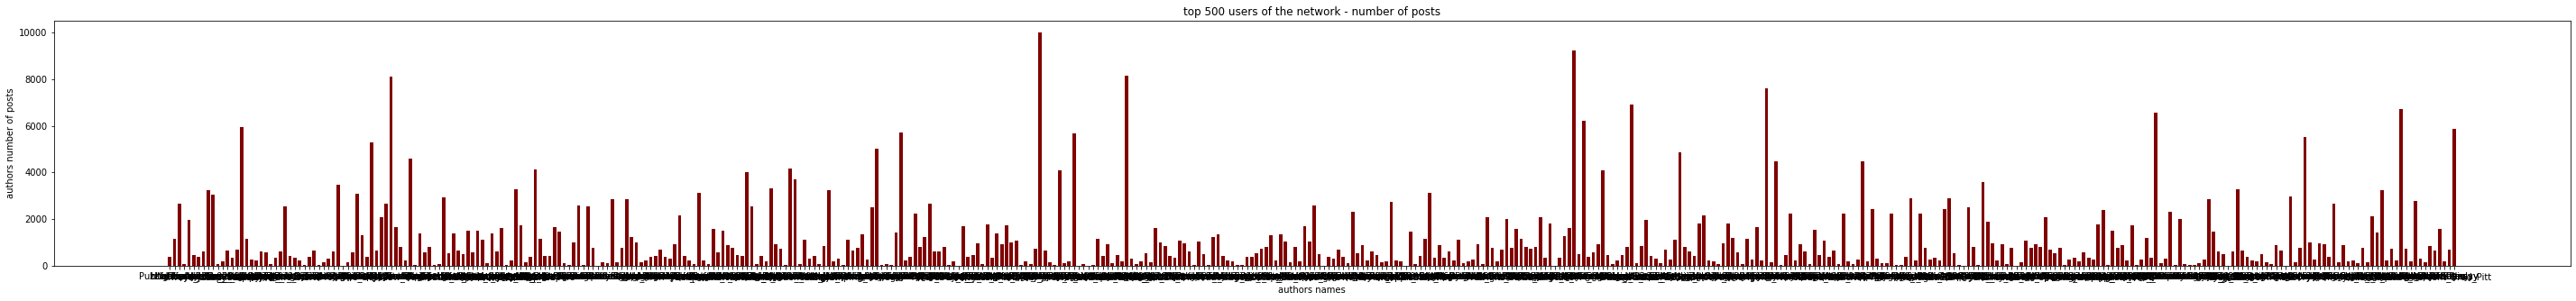

In [134]:
import matplotlib.pyplot as plt
 
# creating the dataset
authors = posts_B_g_by_user_only_small['author']
sum_comments = posts_B_g_by_user_only_small['norm_sum_comments']
  
fig = plt.figure(figsize = (50, 5))
 
# creating the bar plot
plt.bar(authors, sum_comments, color ='maroon',
        width = 0.7)
 
plt.xlabel("authors names")
plt.ylabel("authors number of posts")
plt.title("top 500 users of the network - number of posts")
plt.show()

##### **draw 3 -top 500 users of the network - number of posts - distribution by ranges**

In [135]:
posts_B_g_by_user_only_small_df = posts_B_g_by_user_only_small.to_dataframe()

In [136]:
range_1 = posts_B_g_by_user_only_small_df.query('sum_comments > 0 and sum_comments < 1000').shape[0]
range_2 = posts_B_g_by_user_only_small_df.query('sum_comments > 999 and sum_comments < 5000').shape[0]
range_3 = posts_B_g_by_user_only_small_df.query('sum_comments > 4999 and sum_comments < 10000').shape[0]
range_4 = posts_B_g_by_user_only_small_df.query('sum_comments > 9999 and sum_comments < 100000').shape[0]
range_5 = posts_B_g_by_user_only_small_df.query('sum_comments > 99999').shape[0]


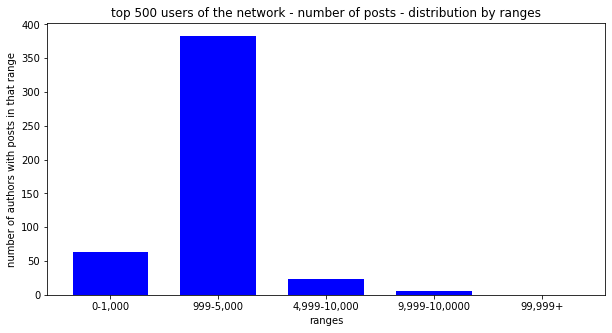

In [137]:
import matplotlib.pyplot as plt
 
# creating the dataset
scores = [range_1, range_2, range_3, range_4, range_5]
rages = ['0-1,000', '999-5,000', '4,999-10,000', '9,999-10,0000', '99,999+' ]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(rages, scores, color ='blue',
        width = 0.7)
 
plt.xlabel("ranges")
plt.ylabel("number of authors with posts in that range")
plt.title("top 500 users of the network - number of posts - distribution by ranges")
plt.show()

##### **draw 4 - sentiment analysis - number of positive and negative post of each author**

In [138]:
posts_B_only_top500_small_sf  = tc.SFrame( posts_B_only_top500_df )
posts_B_only_top500_small_sf = posts_B_only_top500_small_sf['author', 'afinn_score', 'sentiment']

In [139]:
import turicreate.aggregate as agg

In [140]:
posts_B_only_top500_small_GruByUser_sf = posts_B_only_top500_small_sf.groupby(['author','sentiment'],{"sum_post":agg.COUNT()})

In [141]:
posts_B_only_top500_small_GruByUser_small_sf_sort = posts_B_only_top500_small_GruByUser_sf.sort('author')

In [142]:
posts_B_only_top500_small_GruByUser_small_sf_sort

Columns:
	author	str
	sentiment	str
	sum_post	int

Rows: 702

Data:
+------------------+-----------+----------+
|      author      | sentiment | sum_post |
+------------------+-----------+----------+
|      -AMZN       |  Positive |    1     |
|      -Hyre       |  Negative |    1     |
| -Reddit_Account- |  Negative |    1     |
| -Reddit_Account- |  Positive |    1     |
|   -_Han_Yolo_-   |  Negative |    2     |
|   0ptimusPrim0   |  Positive |    7     |
|   0ptimusPrim0   |  Negative |    4     |
| 0toHeroInvesting |  Negative |    4     |
| 0toHeroInvesting |  Positive |    3     |
| 420No_Ragrets69  |  Positive |    2     |
+------------------+-----------+----------+
[702 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [143]:
posts_B_only_top500_small_GruByUser_small_sf_sort_temt = posts_B_only_top500_small_GruByUser_small_sf_sort.groupby('author',{"sum":agg.COUNT()})

In [144]:
posts_B_only_top500_small_GruByUser_small_sf_sort_temt = posts_B_only_top500_small_GruByUser_small_sf_sort_temt[ posts_B_only_top500_small_GruByUser_small_sf_sort_temt['sum']>1]

In [145]:
author_list = list(posts_B_only_top500_small_GruByUser_small_sf_sort_temt['author'])

In [146]:
posts_B_only_top500_small_GruByUser_sf = posts_B_only_top500_small_GruByUser_sf.sort('author')

In [147]:
posts_B_only_top500_small_GruByUser_small_df_sort_temt = posts_B_only_top500_small_GruByUser_sf.to_dataframe()

In [148]:
posts_B_only_top500_small_GruByUser_small_sf_sort_2 =  posts_B_only_top500_small_GruByUser_small_df_sort_temt[ posts_B_only_top500_small_GruByUser_small_df_sort_temt['author'].isin( author_list ) ]

In [149]:
top500_GruByUser_sort = posts_B_only_top500_small_GruByUser_small_sf_sort_2.copy()

In [150]:
top500_GruByUser_sort_neg = tc.SFrame(top500_GruByUser_sort)
top500_GruByUser_sort_pos = tc.SFrame(top500_GruByUser_sort)

In [151]:
top500_GruByUser_sort_neg = top500_GruByUser_sort_neg[ top500_GruByUser_sort_neg['sentiment']=='Negative' ]
top500_GruByUser_sort_pos = top500_GruByUser_sort_pos[ top500_GruByUser_sort_pos['sentiment']=='Positive' ]

In [152]:
top500_GruByUser_sort_join = top500_GruByUser_sort_neg.join(top500_GruByUser_sort_pos, on='author', how='inner')

In [153]:
top500_GruByUser_sort_join

Columns:
	author	str
	sentiment	str
	sum_post	int
	sentiment.1	str
	sum_post.1	int

Rows: 265

Data:
+----------------------+-----------+----------+-------------+------------+
|        author        | sentiment | sum_post | sentiment.1 | sum_post.1 |
+----------------------+-----------+----------+-------------+------------+
|   -Reddit_Account-   |  Negative |    1     |   Positive  |     1      |
|     0ptimusPrim0     |  Negative |    4     |   Positive  |     7      |
|   0toHeroInvesting   |  Negative |    4     |   Positive  |     3      |
|       7eve7up        |  Negative |    9     |   Positive  |     1      |
|       A_Venger       |  Negative |    2     |   Positive  |     1      |
| Acceptable_Wishbone7 |  Negative |    6     |   Positive  |     9      |
|      Adnamaster      |  Negative |    3     |   Positive  |     1      |
|  AnInterestedFellow  |  Negative |    1     |   Positive  |     3      |
|     Analoghogdog     |  Negative |    6     |   Positive  |     3      |
|     AnyHoneydew4     |  Negative |    4     |   Positive  |     11     |
+----------------------+-----------+----------+-------------+------------+
[265 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [154]:
top500_GruByUser_sort_join = top500_GruByUser_sort_join.rename( {'sum_post.1': 'sum_pos'} )
top500_GruByUser_sort_join = top500_GruByUser_sort_join.rename( {'sum_post': 'sum_neg'} )

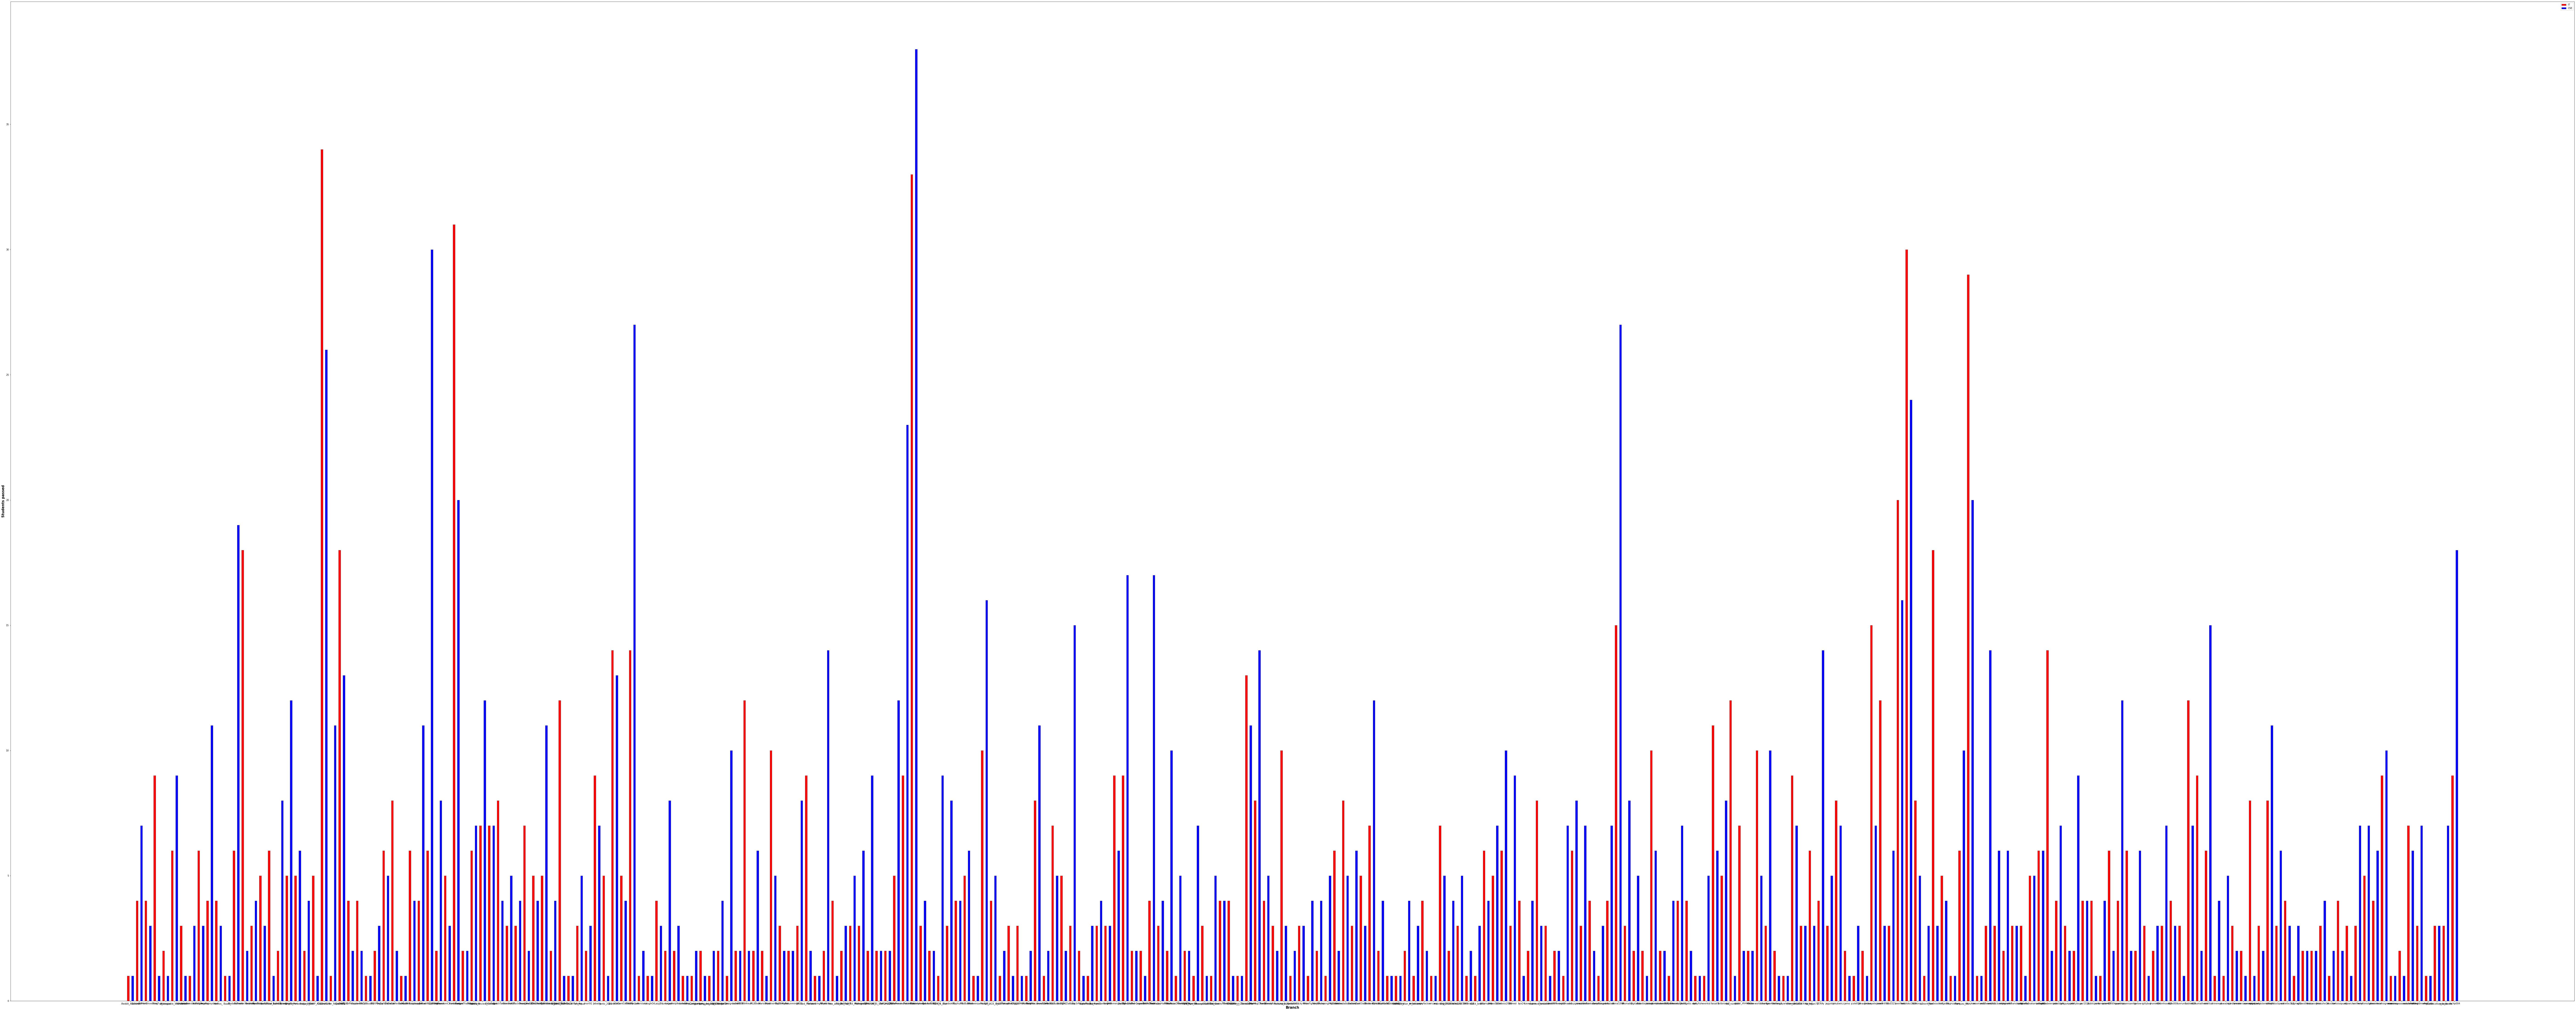

In [155]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(200, 80))
 
# set height of bar
IT = list( top500_GruByUser_sort_join['sum_neg'] )
CSE = list( top500_GruByUser_sort_join['sum_pos'] )
authors = list( top500_GruByUser_sort_join['author'] )

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))], authors )
 
plt.legend()
plt.show()

##### **draw 5 - sentiment analysis - for each rage the number of author with positive posts and the number of negative posts**

In [156]:
top500_GruByUser_sort_join_df = top500_GruByUser_sort_join.to_dataframe()

In [157]:
range_1_P = top500_GruByUser_sort_join_df.query('sum_neg > 0 and sum_neg < 6').shape[0]
range_2_P = top500_GruByUser_sort_join_df.query('sum_neg > 6 and sum_neg < 11').shape[0]
range_3_P = top500_GruByUser_sort_join_df.query('sum_neg > 11 and sum_neg < 31').shape[0]
range_4_P = top500_GruByUser_sort_join_df.query('sum_neg > 31 and sum_neg < 50').shape[0]


range_1_N = top500_GruByUser_sort_join_df.query('sum_pos > 0 and sum_pos < 6').shape[0]
range_2_N = top500_GruByUser_sort_join_df.query('sum_pos > 6 and sum_pos < 11').shape[0]
range_3_N = top500_GruByUser_sort_join_df.query('sum_pos > 11 and sum_pos < 31').shape[0]
range_4_N = top500_GruByUser_sort_join_df.query('sum_pos > 31 and sum_pos < 50').shape[0]

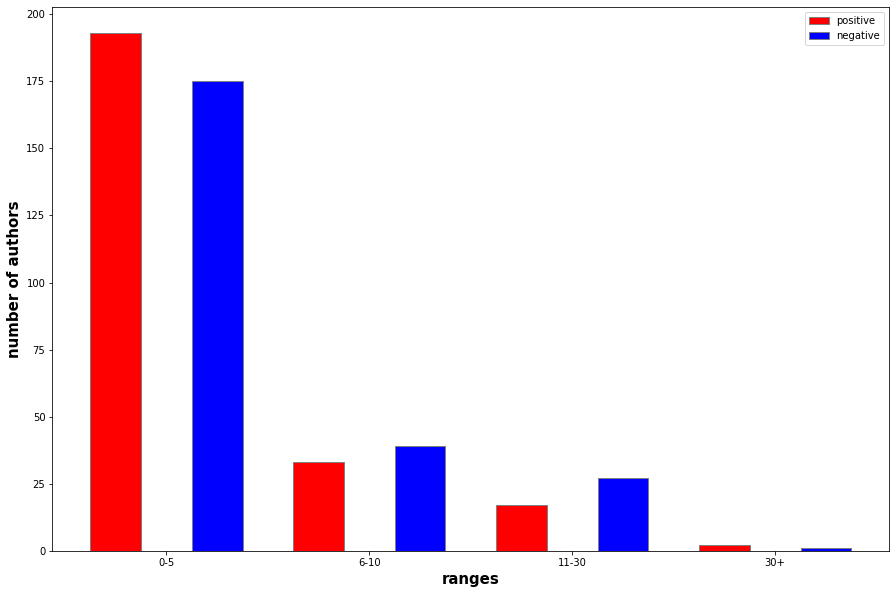

In [158]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(15, 10))
 
# set height of bar
IT = [range_1_P, range_2_P, range_3_P, range_4_P]
CSE = [range_1_N, range_2_N, range_3_N, range_4_N]
authors = ['0-5', '6-10', '11-30', '30+']

# Set position of bar on X axis
br1 = np.arange(len(authors))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='positive')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='negative')
 
# Adding Xticks
plt.xlabel('ranges', fontweight ='bold', fontsize = 15)
plt.ylabel('number of authors', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))], authors )
 
plt.legend()
plt.show()

### **D - unusual events in the community**

*   **the code find out inconsistency behavior between the amount of positive and negative talk over the stock in the social media and the actual stock behavior in the reel world.**
*   **For example: if at a specifid day was alot of positive talk in the social media and the stock value drop drasticly.**

The code get data of specific stock :
1.   media talk amount
2.   classified as positive or negative talk of the stock.
3.   real world data of the stock behavior.







#### data

In [159]:
import turicreate as tc
%matplotlib inline
import time

import pandas as pd
import numpy as np

In [ ]:
#Loading a CSV to SFrame (this can take some time)
reddit_C_posts = tc.SFrame.read_csv("./datasets/WallStreetBets2/wallstreetbets_posts.csv")

In [170]:
reddit_C_posts_small = reddit_C_posts['author', 'created_utc', 'title', 'num_comments']  

In [171]:
def get_date(utc_info):
    date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(utc_info))
    return date

reddit_C_posts_small['date'] = reddit_C_posts_small['created_utc'].apply(lambda s: get_date(s))
reddit_C_posts_small.remove_column('created_utc')

Columns:
	author	str
	title	str
	num_comments	int
	date	str

Rows: 700879

Data:
+-------------------+--------------------------------+--------------+
|       author      |             title              | num_comments |
+-------------------+--------------------------------+--------------+
|    readyrummy1    |    Ruled by the Theta Gods     |      6       |
|     Pluto_Muto    |       3k and I want more       |      0       |
|       Hiro08      | Thank you fellow retards a...  |      0       |
|    uslashuname    | AZN fair value of $55, pri...  |      0       |
|  dadwhomstfucks12 |    I wanna be less retarded    |      0       |
|  officespace2020  |       Motivation Monday        |      9       |
|     PapaShnob     |        thoughts on pfe?        |      0       |
| whydidilookthatup | Papa Musks Tendies taking ...  |      0       |
|  _WinnerTakesAll_ | Did you know Elon is a red...  |      11      |
|   BigSlimetime73  | Toy Yoda (but the car company) |      4       |
+-------------------+--------------------------------+--------------+
+---------------------+
|         date        |
+---------------------+
| 2020-12-14 14:50:30 |
| 2020-12-14 14:50:04 |
| 2020-12-14 14:49:44 |
| 2020-12-14 14:48:02 |
| 2020-12-14 14:48:00 |
| 2020-12-14 14:47:40 |
| 2020-12-14 14:46:49 |
| 2020-12-14 14:46:19 |
| 2020-12-14 14:45:54 |
| 2020-12-14 14:45:27 |
+---------------------+
[700879 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [172]:
def check_date(date_info):
  flag = False
  year = date_info.split('-')[0]
  year = int( year )

  month = date_info.split('-')[1]
  month = int( month )

  day = (date_info.split('-')[2]).split(' ')[0]
  day = int( day )
  
  if year==2021 and ( (month==1 and day>24) or (month==2) ):
    flag =True
    return flag
  else:
    return flag

In [173]:
reddit_C_posts_small['test'] = reddit_C_posts_small['date'].apply( lambda x: check_date(x) ) 
reddit_C_posts_small = reddit_C_posts_small[ reddit_C_posts_small['test']==1]
reddit_C_posts_small = reddit_C_posts_small.remove_column('test')

In [174]:
def split_date(date_info):
  final_d = date_info.split(' ')[0]
  return final_d

In [175]:
reddit_C_posts_small['dates_final'] = reddit_C_posts_small['date'].apply( lambda x: split_date(x) ) 
reddit_C_posts_small = reddit_C_posts_small.remove_column('created_utc')
reddit_C_posts_small = reddit_C_posts_small.remove_column('date')

In [176]:
reddit_C_posts_small = reddit_C_posts_small[ reddit_C_posts_small['num_comments'] > 0]

In [177]:
reddit_C_posts_small

Columns:
	author	str
	title	str
	num_comments	int
	dates_final	str

Rows: Unknown

Data:
+------------------+--------------------------------+--------------+-------------+
|      author      |             title              | num_comments | dates_final |
+------------------+--------------------------------+--------------+-------------+
|   vaultguru123   | GME To The Moon 🚀🚀🚀🚀 I kno...  |      1       |  2021-01-25 |
|   parkerfudge    | My name is Parker Mudge, a...  |      1       |  2021-01-25 |
|   PB-and-Jelly   |  TO THE MOON BOYS 🚀 🚀 🚀 🚀 🚀 🚀  |      1       |  2021-01-25 |
|     Itismunn     | Could you imagine... the s...  |      1       |  2021-01-25 |
|     lolzeph      | I'm unemployed and just pu...  |      1       |  2021-01-25 |
| NewYork_DR0P0UT  | WSB DONT KNOW HOW TO LOSE $AMC |      1       |  2021-01-25 |
|    Trayddotca    |        AMC YOLO 100k in        |      1       |  2021-01-25 |
|    ben-NYC84     |              CCIV              |      1       |  2021-01-25 |
|      rks__       |   It rlly got to this point    |      1       |  2021-01-25 |
| Middle-Hope-9552 |           BBBY YOLO            |      1       |  2021-01-25 |
+------------------+--------------------------------+--------------+-------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [178]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [179]:
reddit_C_posts_small['title'] = reddit_C_posts_small['title'].apply( lambda x: deEmojify(x) ) 
reddit_C_posts_small_clean = reddit_C_posts_small[ reddit_C_posts_small['author'] != '[deleted]' ]

In [180]:
!pip install afinn

In [181]:
from afinn import Afinn
afinn = Afinn()

In [182]:
reddit_C_posts_small_clean['afinn_score'] = reddit_C_posts_small_clean['title'].apply(lambda t: afinn.score(t)) #create score for each title
reddit_C_posts_small_clean = reddit_C_posts_small_clean[reddit_C_posts_small_clean['afinn_score'] != 0] #delete title with score 0 not pos and not neg

In [183]:
reddit_C_posts_small_clean

Columns:
	author	str
	title	str
	num_comments	int
	dates_final	str
	afinn_score	float

Rows: Unknown

Data:
+--------------------+-------------------------------+--------------+-------------+
|       author       |             title             | num_comments | dates_final |
+--------------------+-------------------------------+--------------+-------------+
|    vaultguru123    | GME To The Moon  I know th... |      1       |  2021-01-25 |
|    parkerfudge     | My name is Parker Mudge, a... |      1       |  2021-01-25 |
|      Itismunn      | Could you imagine... the s... |      1       |  2021-01-25 |
|   andriustrading   | Entered PLTR all in at 38.... |      1       |  2021-01-25 |
|      JakcCSGO      | $NOK DD comprehensive comp... |      2       |  2021-01-25 |
| PrincetonStudent69 | YOLO $CLII the future of e... |      1       |  2021-01-25 |
|     evadtrades     | Bought 720 BNGO shares @ 1... |      1       |  2021-01-25 |
|  LowKeyNatureGuy   |    HOLD YOU TURKEY BITCHES    |      1       |  2021-01-25 |
|    myke_oxbig45    | Doing my part to be retarded  |      1       |  2021-01-25 |
|    fortress_sf     | Complete idiot here trying... |      1       |  2021-01-25 |
+--------------------+-------------------------------+--------------+-------------+
+-------------+
| afinn_score |
+-------------+
|     3.0     |
|     -2.0    |
|     4.0     |
|     1.0     |
|     2.0     |
|     5.0     |
|     2.0     |
|     -5.0    |
|     -2.0    |
|     -3.0    |
+-------------+
[? rows x 5 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [184]:
def label2sentiment(label):
    if label >= 1:
        return "Positive"
    else:
        return "Negative"

In [185]:
reddit_C_posts_small_clean['sentiment'] = reddit_C_posts_small_clean['afinn_score'].apply(lambda label: label2sentiment(label))

In [186]:
reddit_C_posts_small_clean

Columns:
	author	str
	title	str
	num_comments	int
	dates_final	str
	afinn_score	float
	sentiment	str

Rows: 62572

Data:
+--------------------+-------------------------------+--------------+-------------+
|       author       |             title             | num_comments | dates_final |
+--------------------+-------------------------------+--------------+-------------+
|    vaultguru123    | GME To The Moon  I know th... |      1       |  2021-01-25 |
|    parkerfudge     | My name is Parker Mudge, a... |      1       |  2021-01-25 |
|      Itismunn      | Could you imagine... the s... |      1       |  2021-01-25 |
|   andriustrading   | Entered PLTR all in at 38.... |      1       |  2021-01-25 |
|      JakcCSGO      | $NOK DD comprehensive comp... |      2       |  2021-01-25 |
| PrincetonStudent69 | YOLO $CLII the future of e... |      1       |  2021-01-25 |
|     evadtrades     | Bought 720 BNGO shares @ 1... |      1       |  2021-01-25 |
|  LowKeyNatureGuy   |    HOLD YOU TURKEY BITCHES    |      1       |  2021-01-25 |
|    myke_oxbig45    | Doing my part to be retarded  |      1       |  2021-01-25 |
|    fortress_sf     | Complete idiot here trying... |      1       |  2021-01-25 |
+--------------------+-------------------------------+--------------+-------------+
+-------------+-----------+
| afinn_score | sentiment |
+-------------+-----------+
|     3.0     |  Positive |
|     -2.0    |  Negative |
|     4.0     |  Positive |
|     1.0     |  Positive |
|     2.0     |  Positive |
|     5.0     |  Positive |
|     2.0     |  Positive |
|     -5.0    |  Negative |
|     -2.0    |  Negative |
|     -3.0    |  Negative |
+-------------+-----------+
[62572 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [187]:
def do_title_contain_word(title, word):
  title = title.lower()
  if word in title:
    return True
  else:
    return False

In [188]:
word = "gme"
reddit_C_posts_small_clean['contain_word'] = reddit_C_posts_small_clean['title'].apply(lambda t: do_title_contain_word(t, word) ) #create score for each title
reddit_C_posts_small_gme = reddit_C_posts_small_clean[ reddit_C_posts_small_clean['contain_word']==1 ]
reddit_C_posts_small_gme = reddit_C_posts_small_gme['dates_final', 'sentiment', 'contain_word']

In [189]:
reddit_C_posts_small_gme = reddit_C_posts_small_gme['dates_final', 'sentiment', 'contain_word']

In [190]:
import turicreate.aggregate as agg

In [191]:
reddit_C_posts_small_gme_GB = reddit_C_posts_small_gme.groupby( ['dates_final', 'sentiment'] ,{"talk_sum":agg.SUM("contain_word")})

In [192]:
reddit_C_posts_small_gme_GB.rename( {'dates_final': 'Date'} )
reddit_C_posts_small_gme_GB_sf = tc.SFrame(reddit_C_posts_small_gme_GB)
reddit_C_posts_small_gme_GB_sf_only_pos = reddit_C_posts_small_gme_GB_sf[ reddit_C_posts_small_gme_GB_sf['sentiment']=='Positive']
reddit_C_posts_small_gme_GB_sf_only_neg = reddit_C_posts_small_gme_GB_sf[ reddit_C_posts_small_gme_GB_sf['sentiment']=='Negative']

In [193]:
#GME stock data from Question 1 section A
GME_EvDay_amount = pd.DataFrame({'Date': ['2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
                                          '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04'],
                                 'stock_close': [76, 147, 347, 193, 325, 225, 90, 92, 53],
                                 'talk_amount': [3700, 1941, 10332, 28102, 15706, 13312, 14525, 5827, 301]})

In [194]:
GME_EvDay_amount_sf = tc.SFrame(GME_EvDay_amount)

In [195]:
def add_uniqe_id(date):
  date = str(date)

  day = (date.split('-')[2])
  if ('30' in day ) or ('31' in day ):
    day = day
  else:
    if '0' in day:
      day = day.split('0')[1]
  

  month = (date.split('-')[1])
  if '0' in month:
    month=month.split('0')[1]

  # print(date)
  # print(day)
  day = int( day )
  month = int(month)
  if month<9:
    return (month*100)+day 
  else:
      return (month*10)+day 


In [196]:
GME_EvDay_amount_sf['id'] = GME_EvDay_amount_sf['Date'].apply(lambda t: add_uniqe_id(t) )
reddit_C_posts_small_gme_GB_sf_only_neg['id'] = reddit_C_posts_small_gme_GB_sf_only_neg['dates_final'].apply(lambda t: add_uniqe_id(t) )
reddit_C_posts_small_gme_GB_sf_only_pos['id'] = reddit_C_posts_small_gme_GB_sf_only_pos['dates_final'].apply(lambda t: add_uniqe_id(t) )

In [197]:
reddit_C_posts_small_gme_GB_sf_only_neg = reddit_C_posts_small_gme_GB_sf_only_neg[ reddit_C_posts_small_gme_GB_sf_only_neg['id'] != 130]
reddit_C_posts_small_gme_GB_sf_only_neg = reddit_C_posts_small_gme_GB_sf_only_neg[ reddit_C_posts_small_gme_GB_sf_only_neg['id'] != 131]

reddit_C_posts_small_gme_GB_sf_only_pos = reddit_C_posts_small_gme_GB_sf_only_pos[ reddit_C_posts_small_gme_GB_sf_only_pos['id'] != 130]
reddit_C_posts_small_gme_GB_sf_only_pos = reddit_C_posts_small_gme_GB_sf_only_pos[ reddit_C_posts_small_gme_GB_sf_only_pos['id'] != 131]

join all three tables

In [198]:
gme_and_pos = GME_EvDay_amount_sf.join(reddit_C_posts_small_gme_GB_sf_only_neg, on='id', how='inner')
gme_and_pos_neg = gme_and_pos.join(reddit_C_posts_small_gme_GB_sf_only_pos, on='id', how='inner')

In [199]:
gme_and_pos_neg = gme_and_pos_neg.rename( {'talk_sum':'neg_amount'} )
gme_and_pos_neg = gme_and_pos_neg.rename( {'talk_sum.1':'pos_amount'} )

In [200]:
gme_and_pos_neg = gme_and_pos_neg['Date', 'stock_close', 'talk_amount', 'neg_amount', 'pos_amount']

In [201]:
gme_and_pos_neg['pos_neg_difference'] = 0

####  Inconsistency detection

the "gme_and_pos_neg" table contain the final data of the "GME" stock:
*   Date 
*   stock_close - the stock value at the end of the day
*   talk_amount - the amount of talk about the stock in the social media
*   neg_amount - the amount of negative classified post talk about the stock in the social media at that date
*   pos_amount - the amount of positive classified post talk about the stock in the social media at that date






In [202]:
gme_and_pos_neg

Columns:
	Date	str
	stock_close	int
	talk_amount	int
	neg_amount	int
	pos_amount	int
	pos_neg_difference	int

Rows: 9

Data:
+------------+-------------+-------------+------------+------------+--------------------+
|    Date    | stock_close | talk_amount | neg_amount | pos_amount | pos_neg_difference |
+------------+-------------+-------------+------------+------------+--------------------+
| 2021-02-03 |      92     |     5827    |    186     |    323     |         0          |
| 2021-01-29 |     325     |    15706    |    605     |    876     |         0          |
| 2021-01-25 |      76     |     3700    |    160     |    216     |         0          |
| 2021-01-26 |     147     |     1941    |     78     |    127     |         0          |
| 2021-01-28 |     193     |    28102    |    2551    |    2056    |         0          |
| 2021-01-27 |     347     |    10332    |    1424    |    1490    |         0          |
| 2021-02-02 |      90     |    14525    |    936     |    786     |         0          |
| 2021-02-01 |     225     |    13312    |    422     |    677     |         0          |
| 2021-02-04 |      53     |     301     |     18     |     11     |         0          |
+------------+-------------+-------------+------------+------------+--------------------+
[9 rows x 6 columns]

In [203]:
gme_and_pos_neg_df = gme_and_pos_neg.to_dataframe()

In [ ]:
for index, row in gme_and_pos_neg_df.iterrows():
  gme_and_pos_neg_df['pos_neg_difference'][index] = int(row['pos_amount']) - int(row['neg_amount'])
  print( int(row['pos_amount']) - int(row['neg_amount']) )

In [205]:
gme_and_pos_neg_df

Date  stock_close  ...  pos_amount  pos_neg_difference
0  2021-02-03           92  ...         323                 137
1  2021-01-29          325  ...         876                 271
2  2021-01-25           76  ...         216                  56
3  2021-01-26          147  ...         127                  49
4  2021-01-28          193  ...        2056                -495
5  2021-01-27          347  ...        1490                  66
6  2021-02-02           90  ...         786                -150
7  2021-02-01          225  ...         677                 255
8  2021-02-04           53  ...          11                  -7

[9 rows x 6 columns]

**find the inconsistency behavior**

In [206]:
# dataframe of stock, date, media talk amount, real world data( close price of stock that day)

def find_out_stock_behavir_inconsistency( stock_data ):
  date = ''
  stock_amount_b = 0
  pos_neg_difference_b = 0

  for index, row in stock_data.iterrows():
    date = stock_data['Date'][index]
    stock_amount_n = stock_data['stock_close'][index]
    pos_neg_difference_n = stock_data['pos_neg_difference'][index]
    if ( (pos_neg_difference_n-pos_neg_difference_b)>0 and (stock_amount_n-stock_amount_b)<0 ) :
      print("on the date:   " + str(date) + " there is an increase in the positive posts and talk in the social ")
      print("               media about the stock ,but there is an opposite result of decline in the stock value from "+ str(stock_amount_b) +" to "+ str(stock_amount_n) )
      print("")
    if ( (pos_neg_difference_n-pos_neg_difference_b)<0 and (stock_amount_n-stock_amount_b)>0 ) :
      print("on the date: " + str(date) + " there is an increase in the negative posts and talk in the social media")
      print(",            about the stock ,but there is an opposite result of increase in the stock value from "+ str(stock_amount_b) +" to "+ str(stock_amount_n) )
      print("")
    #############################################
    stock_amount_b = stock_amount_n
    pos_neg_difference_b = pos_neg_difference_n
    date=""


find_out_stock_behavir_inconsistency(gme_and_pos_neg_df)

on the date: 2021-01-26 there is an increase in the negative posts and talk in the social media
,            about the stock ,but there is an opposite result of increase in the stock value from 76 to 147

on the date: 2021-01-28 there is an increase in the negative posts and talk in the social media
,            about the stock ,but there is an opposite result of increase in the stock value from 147 to 193



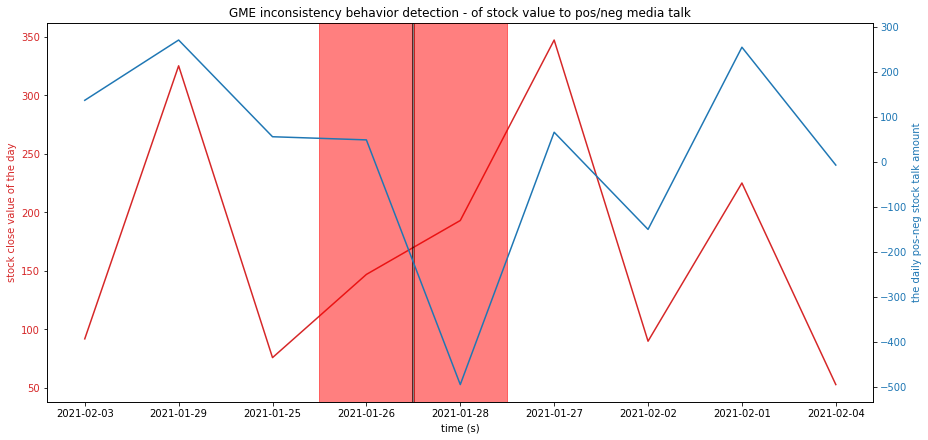

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
data1 = gme_and_pos_neg_df['stock_close']
data2 = gme_and_pos_neg_df['pos_neg_difference']
time = gme_and_pos_neg_df['Date']

fig, ax1 = plt.subplots()
fig.set_size_inches(13,6)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('stock close value of the day', color=color)
ax1.plot(time, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('the daily pos-neg stock talk amount', color=color)  # we already handled the x-label with ax1
ax2.plot(time, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('GME inconsistency behavior detection - of stock value to pos/neg media talk')
plt.axvspan(2.5, 3.49, color='red', alpha=0.5)
plt.axvspan(3.49, 3.51, color='black', alpha=0.5)
plt.axvspan(3.51, 4.5, color='red', alpha=0.5)

plt.show()

**As you can see there is two day that show inconsistency behavior:**

*   on the date: 2021-01-26 there is an increase in the negative posts and talk in the social media
,            about the stock ,but there is an opposite result of increase in the stock value from 76 to 147
*   on the date: 2021-01-28 there is an increase in the negative posts and talk in the social media
,            about the stock ,but there is an opposite result of increase in the stock value from 147 to 193



## **Q-2: state of Michigan - COVID-19**

### imports and data

In [ ]:
!pip install panda
!pip install turicreate

In [21]:
import datetime
import turicreate as tc
import pandas as pd

In [22]:
###################################################### A
import datetime
import re
###################################################### B
from PIL import Image
import requests
# importing modules
import urllib.request
from PIL import Image

### A - "michigandaily" website (https://www.michigandaily.com/ )  - **state of Michigan** daily news **Data mining**


#### data


In [210]:
def get_article_data(html):
  title = html.split("entry-container")[1]
  title1 = title.split("entry-title")[1]
  title2 = title1.split("<a href=")[1]
  title3 = title2.split('rel=')[1]
  title4 = title3.split('<')[0]

  id = html.split("post-")[1]
  id1 = id.split(" ")[0]
  id2 = id1.split( '\"' )[0]


  date = html.split("entry-container")[1]
  if ('entry-meta' in date) and ('datetime' in date):
    date = date.split('entry-meta')[1]
    date = date.split('posted-on')[1]
    date = date.split('datetime=')[1]
    date = date.split('T')[0]
    date = date.split('\"')[1]
    if 'p>' in date:
      date = date.split("p>")[1]  
      date = date.split(".")[0]
  # print(date)

  day = date.split('-')[0]
  month = date.split('-')[1]
  year = date.split('-')[2]

  page_info = [ [title4, id2, date, year, month, day] ]
  return page_info

scane the webside function

In [212]:
import requests
import tqdm
all_data_from_wesite = []

for page_num in range(2,247):
  page_list = [] 
  url = "https://www.michigandaily.com/page/" + str(page_num) + "/?s=covid"
  req_info = requests.get(url).content.decode('utf-8')
  html = req_info

  mainData2 = html.split("site-main")[1]
  mainData3 = mainData2.split('">\n\n\t\t\n<')[0]
  mainData4 = mainData3.split("article id=")

  i=0
  for article in mainData4 :
    if i==0:
      i=i+1
    else:
      article_info = get_article_data(article)
      page_list.extend( article_info )
    i=i+1
###########################################################
  all_data_from_wesite.extend( page_list )

####  Create dataframe from the website info

In [213]:
website_data_df = pd.DataFrame( columns=['date', 'article_id', 'title'])

for article in all_data_from_wesite:
  title = str( article[0] )
  id = int( article[1] )
  date = str( article[2] )
  year = str( article[3] )
  month = str( article[4] )
  day = str( article[5] )
  combo = str(day)+"-"+str(month)

  website_data_df = website_data_df.append( {'article_id' : id, 'title':title, 'date' : date, 'year':day, 'month':month, 'day':year, 'year-month':combo }, ignore_index=True)

In [214]:
website_data_sf = tc.SFrame(website_data_df)

In [215]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [216]:
website_data_sf['title'] = website_data_sf['title'].apply( lambda x: deEmojify(x) ) 

In [217]:
website_data_sf

Columns:
	date	str
	article_id	int
	title	str
	day	str
	month	str
	year	str
	year-month	str

Rows: 990

Data:
+------------+------------+-------------------------------+-----+-------+------+
|    date    | article_id |             title             | day | month | year |
+------------+------------+-------------------------------+-----+-------+------+
| 2021-02-24 |   162746   | "bookmark">Michigan volley... |  24 |   02  | 2021 |
| 2020-10-07 |    300     | "bookmark">Live music in t... |  07 |   10  | 2020 |
| 2020-09-06 |    809     | "bookmark">A mosh pit, an ... |  06 |   09  | 2020 |
| 2020-10-22 |     14     | "bookmark">Concerns over C... |  22 |   10  | 2020 |
| 2020-03-28 |    2007    | "bookmark">The Daily’s COV... |  28 |   03  | 2020 |
| 2021-05-06 |   276809   | "bookmark">Research Sympos... |  06 |   05  | 2021 |
| 2021-06-17 |   282498   | "bookmark">Whitmer to lift... |  17 |   06  | 2021 |
| 2021-04-19 |   177917   | "bookmark">The University ... |  19 |   04  | 2021 |
| 2020-07-29 |    1096    | "bookmark">My experience i... |  29 |   07  | 2020 |
| 2020-05-11 |    1600    | "bookmark">Leah Adelman: C... |  11 |   05  | 2020 |
+------------+------------+-------------------------------+-----+-------+------+
+------------+
| year-month |
+------------+
|  2021-02   |
|  2020-10   |
|  2020-09   |
|  2020-10   |
|  2020-03   |
|  2021-05   |
|  2021-06   |
|  2021-04   |
|  2020-07   |
|  2020-05   |
+------------+
[990 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [218]:
def clean_title(text):
    text = str(text)
    text1 = text.lower()
    text2 = text1.split('>')[1]
    return text2

In [219]:
website_data_sf['title'] = website_data_sf['title'].apply( lambda x: clean_title(x) ) 

In [220]:
import turicreate.aggregate as agg

In [221]:
website_data_sf_gb = website_data_sf.groupby(['year-month'],{"media_count":agg.COUNT()})

In [222]:
website_data_sf_gb_sort = website_data_sf_gb.sort('year-month')

In [223]:
website_data_sf_gb_sort

Columns:
	year-month	str
	media_count	int

Rows: 19

Data:
+-------------------------------+-------------+
|           year-month          | media_count |
+-------------------------------+-------------+
| ">\n\t\t\t\t<header class=... |      1      |
|            2020-02            |      1      |
|            2020-03            |      88     |
|            2020-04            |      87     |
|            2020-05            |      79     |
|            2020-06            |      50     |
|            2020-07            |      59     |
|            2020-08            |      69     |
|            2020-09            |     135     |
|            2020-10            |     161     |
+-------------------------------+-------------+
[19 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### B - graphic show of the **COVID-19 Waves** (1-4)

**Conclusions and anaysis of findings:**

*   The plague outbreaks can be seen in the graph in the **highlighted** areas, and the severity of the number of new cases per day show by the color stand out **( yellow- orange- red)**.
*   It can be seen that there is a match between the articles amount from the webside news and the outbreaks waves. **It can be seen that before each outbreak the amount of articles on the site increases**




**The Michigan state new cases graph**

In [227]:
import urllib.request
from PIL import Image

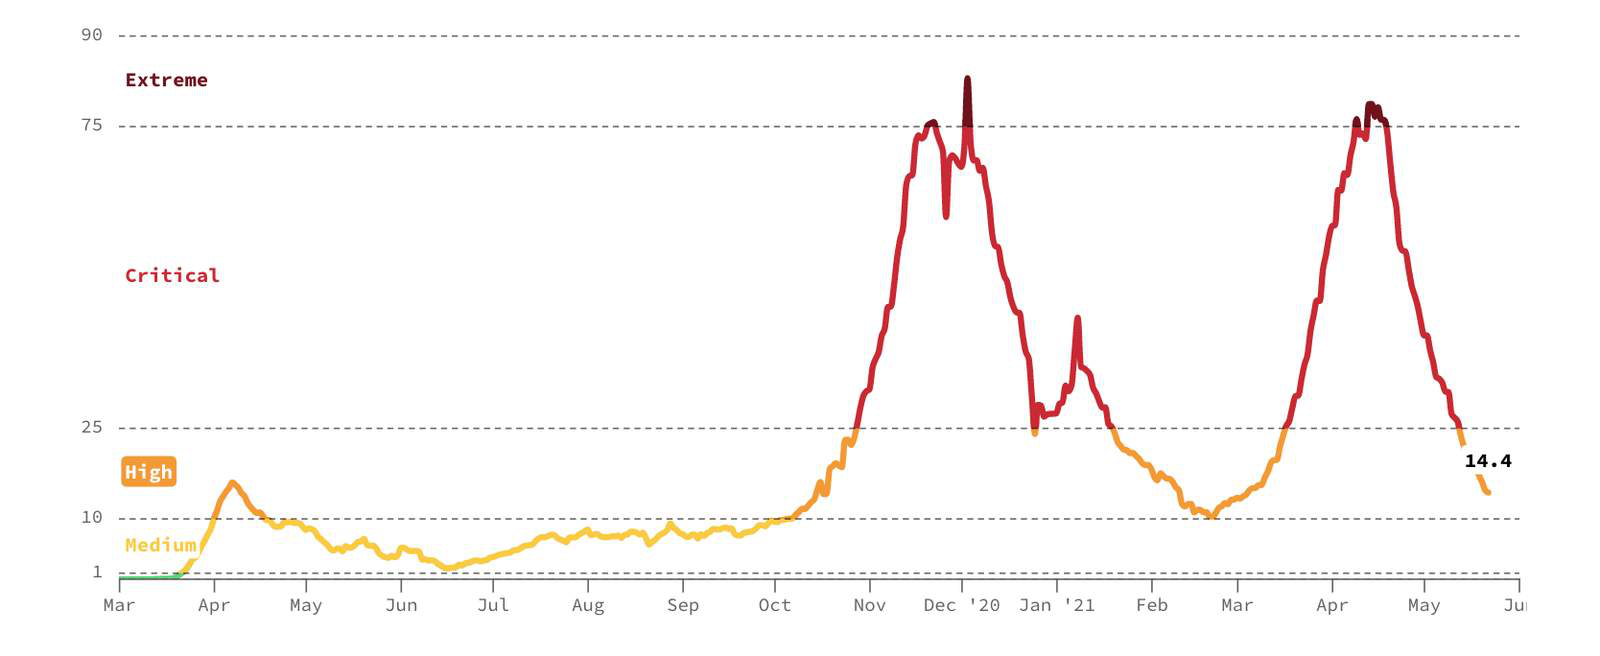

In [228]:
img1 = urllib.request.urlretrieve(
  'https://www.clickondetroit.com/resizer/hzhKZnPcyAsw96_ImYuDGUu1h3g=/'+
  '1600x656/smart/filters:format(jpeg):strip_exif(true):strip_icc(true):no_upscale(true):quality(65)/cloudfront'+
  '-us-east-1.images.arcpublishing.com/gmg/V2UDGKD6GRCUDI3TRVGE5TKERY.png',
   "gfg.png")
  
  
img = Image.open("gfg.png")
img

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


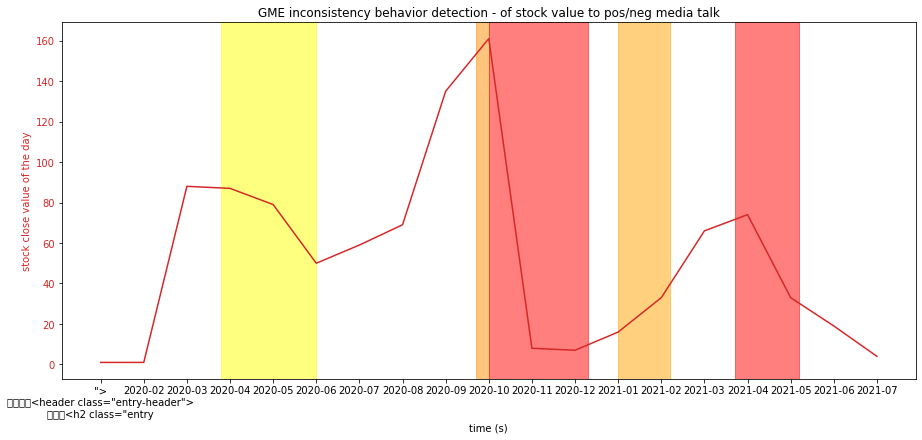

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
data1 = website_data_sf_gb_sort['media_count']
# data2 = website_data_sf_gb['pos_neg_difference']
time = website_data_sf_gb_sort['year-month']

fig, ax1 = plt.subplots()
fig.set_size_inches(13,6)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('stock close value of the day', color=color)
ax1.plot(time, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('the daily pos-neg stock talk amount', color=color)  # we already handled the x-label with ax1
# ax2.plot(time, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('GME inconsistency behavior detection - of stock value to pos/neg media talk')
plt.axvspan(2.8, 5, color='yellow', alpha=0.5)
plt.axvspan(8.7, 9, color='darkorange', alpha=0.5)
plt.axvspan(9, 11.3, color='red', alpha=0.5)
plt.axvspan(12, 13.2, color='orange', alpha=0.5)
plt.axvspan(14.7, 16.2, color='red', alpha=0.5)
plt.show()

### C - ***ISRAEL*** 3,4 **outbreaks copmarison** to the 1,2 outbreaks by :

*   **fual**: cost per liter - https://fuelcalcprod.energydmz.org/

*   **electricity**: monthly AVG "SMP measure" - https://www.gov.il/he/Departments/General/energy_information

*   **COVID-19: daily new verified patients** - https://datadashboard.health.gov.il/COVID-19/general






**Conclusions:**

**The highlighted areas represents the outbreaks periods - color change by severity**
*   **fuel:** It can be seen that in the first outbreake that fuel prices are falling significantly, which makes sense since that in the first outbreak of the COVID-19 a lot of people were afraid to leave the house and fuel consumption dropped and so did the prices accordingly.
However, an increase in fuel prices can be seen in outbreaks 2 and 3, since the population has learned to live with the current situation and to adopt a routine of life.
*   **electricity SMP prices:** It can be seen that there is a good correlation between the monthly amount of new patients and electricity "smp" prices, which is surprising since that the third outbreak is during the winter period when electricity consumption is supposed to get low but it remains high unlike the first outbreak period.



In [53]:
# d = {'date': ['20-01' , '20-02' , '20-03' , '20-04' , '20-05' , '20-06' , '20-07' , '20-08' , '20-09' , '20-10' , '20-11' , '20-12' , 
#               '21-01' , '21-02' , '21-03' , '21-04' , '21-05' , '21-06', '21-07' ],
#      'fuel_liter_price': ['6.14', '5.99', '5.92', '4.89', '4.79', '5.21', '5.44', '5.45', '5.5', '5.46', '5.34', '5.43',
#                           '5.51', '5.72', '5.99', '6.04', '6.06', '6.13', '6.31'],
#      'electricity_prices_AVG_SMP': ['156', '149', '132', '124', '133', '119', '133', '136', '145', '137', '121', '105',
#                                     '121', '117', '110', '0', '0', '0', '0'],
#      'verified_patients': ['0', '6', '5729', '10195', '1187', '8367', '44940', '45274', '130629', '66950', '22847', '88584',
#                            '220047', '131417', '56111', '4945', '918', '3271', '0'] }
# all_data = pd.DataFrame(data=d)

I could not filt electricity data after march 2021 !!!

In [230]:
d2 = {'date': ['20-01' , '20-02' , '20-03' , '20-04' , '20-05' , '20-06' , '20-07' , '20-08' , '20-09' , '20-10' , '20-11' , '20-12' , 
              '21-01' , '21-02' , '21-03' , '21-04' , '21-05' , '21-06', '21-07' ],
     'fuel_liter_price': ['6.14', '5.99', '5.92', '4.89', '4.79', '5.21', '5.44', '5.45', '5.5', '5.46', '5.34', '5.43',
                          '5.51', '5.72', '5.99', '6.04', '6.06', '6.13', '6.31'],
     'electricity_prices_AVG_SMP': ['15.6', '14.9', '13.2', '12.4', '13.3', '11.9', '13.3', '13.6', '14.5', '13.7', '12.1', '10.5',
                                    '12.1', '11.7', '11.0', '0', '0', '0', '0'],
     'verified_patients': ['0', '6', '57.29', '101.95', '11.87', '83.67', '449.40', '452.74', '1306.29', '669.50', '228.47', '885.84',
                           '2200.47', '1314.17', '561.11', '49.45', '9.18', '32.71', '0'] }
all_data_2 = pd.DataFrame( data=d2 )

In [231]:
all_data_2

date fuel_liter_price electricity_prices_AVG_SMP verified_patients
0   20-01             6.14                       15.6                 0
1   20-02             5.99                       14.9                 6
2   20-03             5.92                       13.2             57.29
3   20-04             4.89                       12.4            101.95
4   20-05             4.79                       13.3             11.87
5   20-06             5.21                       11.9             83.67
6   20-07             5.44                       13.3            449.40
7   20-08             5.45                       13.6            452.74
8   20-09              5.5                       14.5           1306.29
9   20-10             5.46                       13.7            669.50
10  20-11             5.34                       12.1            228.47
11  20-12             5.43                       10.5            885.84
12  21-01             5.51                       12.1           2200.47
13  21-02             5.72                       11.7           1314.17
14  21-03             5.99                       11.0            561.11
15  21-04             6.04                          0             49.45
16  21-05             6.06                          0              9.18
17  21-06             6.13                          0             32.71
18  21-07             6.31                          0                 0

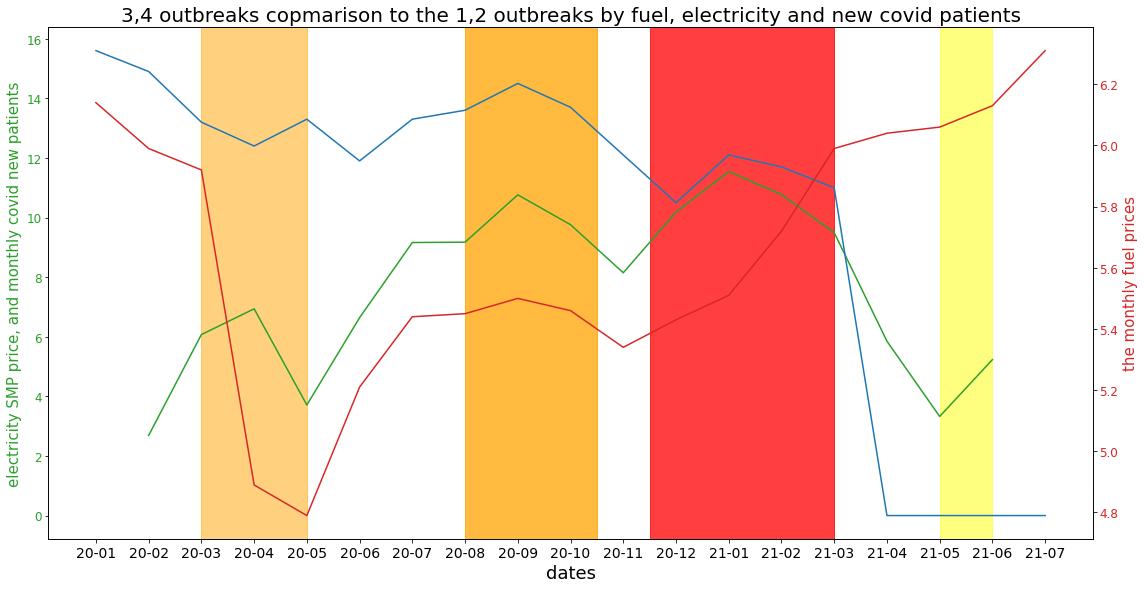

In [233]:
import numpy as np
import matplotlib.pyplot as plt
# Create some mock data
fuel_data = all_data_2['fuel_liter_price'].apply(float)
electricity_data = all_data_2['electricity_prices_AVG_SMP'].apply(float)
patients_data = all_data_2['verified_patients'].apply(lambda x: np.log(float(x) )*1.5 )
time = all_data_2['date']

#font and image fizes
fig, ax1 = plt.subplots()
fig.set_size_inches(16,8)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=12) 

#highlited area colors
# plt.axvspan(2, 4, color='orange', alpha=0.5)
# plt.axvspan(7, 9.5, color='red', alpha=0.5)
# plt.axvspan(10.5, 14, color='red', alpha=0.5)
# plt.axvspan(10.5, 14, color='red', alpha=0.5)
# plt.axvspan(16, 17, color='yellow', alpha=0.5)
plt.axvspan(2, 4, color='orange', alpha=0.5)###
plt.axvspan(7, 9.5, color='orange', alpha=0.5)###
plt.axvspan(7, 9.5, color='orange', alpha=0.5)###
plt.axvspan(10.5, 14, color='red', alpha=0.5)###
plt.axvspan(10.5, 14, color='red', alpha=0.5)
plt.axvspan(16, 17, color='yellow', alpha=0.5)###

color1 = 'tab:green' ################################################### fuel
ax1.set_xlabel('dates', fontdict={'fontsize': 18 })
ax1.set_ylabel('electricity SMP price, and monthly covid new patients', color=color1 , fontdict={'fontsize': 15 })
ax1.plot(time, patients_data, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'tab:blue' ################################################### electricity
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('stock close value of the day', color=color2)
ax1.plot(time, electricity_data, color=color2)
# ax1.tick_params(axis='y', labelcolor=color2)

######################################################################################################### fuel_data
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color3 = 'tab:red'
ax2.set_ylabel('the monthly fuel prices', color=color3 , fontdict={'fontsize': 15 } )  # we already handled the x-label with ax1
ax2.plot(time, fuel_data , color=color3)
ax2.tick_params(axis='y', labelcolor=color3)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(label='3,4 outbreaks copmarison to the 1,2 outbreaks by fuel, electricity and new covid patients', fontdict={'fontsize': 20 } )
plt.show()

## **Q-3: Fake news detection**

### data

In [ ]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liorbaruchovich","key":"62c4c441caba1bfa2738494828e1a9bc"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/fake-news

# download the dataset from Kaggle and unzip it
!kaggle datasets download jruvika/fake-news-detection -p ./datasets/fake-news
!unzip ./datasets/fake-news/*.zip  -d ./datasets/fake-news/

In [4]:
!ls ./datasets/fake-news/

data.csv  data.h5  fake-news-detection.zip


In [5]:
import turicreate as tc
%matplotlib inline

fake_news_dataset_path = "./datasets/fake-news/data.csv"
sf = tc.SFrame.read_csv(fake_news_dataset_path)

Finished parsing file /content/datasets/fake-news/data.csv

Parsing completed. Parsed 100 lines in 0.409924 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/fake-news/data.csv

Parsing completed. Parsed 4009 lines in 0.275153 secs.

In [6]:
sf

Columns:
	URLs	str
	Headline	str
	Body	str
	Label	int

Rows: 4009

Data:
+-------------------------------+-------------------------------+
|              URLs             |            Headline           |
+-------------------------------+-------------------------------+
| http://www.bbc.com/news/wo... | Four ways Bob Corker skewe... |
| https://www.reuters.com/ar... | Linklater's war veteran co... |
| https://www.nytimes.com/20... | Trump’s Fight With Corker ... |
| https://www.reuters.com/ar... | Egypt's Cheiron wins tie-u... |
| http://www.cnn.com/videos/... | Jason Aldean opens 'SNL' w... |
| http://beforeitsnews.com/s... | JetNation FanDuel League; ... |
| https://www.nytimes.com/20... | Kansas Tried a Tax Plan Si... |
| https://www.reuters.com/ar... | India RBI chief: growth im... |
| https://www.reuters.com/ar... | EPA chief to sign rule on ... |
| https://www.reuters.com/ar... | Talks on sale of Air Berli... |
+-------------------------------+-------------------------------+
+-------------------------------+-------+
|              Body             | Label |
+-------------------------------+-------+
| Image copyright Getty Imag... |   1   |
| LONDON (Reuters) - “Last F... |   1   |
| The feud broke into public... |   1   |
| MEXICO CITY (Reuters) - Eg... |   1   |
| Country singer Jason Aldea... |   1   |
| JetNation FanDuel League; ... |   0   |
| In 2012, Kansas lawmakers,... |   1   |
| The Reserve Bank of India ... |   1   |
| Scott Pruitt, Administrato... |   1   |
| FILE PHOTO - An Air Berlin... |   1   |
+-------------------------------+-------+
[4009 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [7]:
import turicreate as tc
from nltk.corpus import stopwords
from nltk.stem.porter import *
from functools import lru_cache
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

In [8]:
sf['full_text'] = sf.apply(lambda r: r['Headline'] + "\n\n" + r['Body'])

In [9]:
sf

Columns:
	URLs	str
	Headline	str
	Body	str
	Label	int
	full_text	str

Rows: 4009

Data:
+-------------------------------+-------------------------------+
|              URLs             |            Headline           |
+-------------------------------+-------------------------------+
| http://www.bbc.com/news/wo... | Four ways Bob Corker skewe... |
| https://www.reuters.com/ar... | Linklater's war veteran co... |
| https://www.nytimes.com/20... | Trump’s Fight With Corker ... |
| https://www.reuters.com/ar... | Egypt's Cheiron wins tie-u... |
| http://www.cnn.com/videos/... | Jason Aldean opens 'SNL' w... |
| http://beforeitsnews.com/s... | JetNation FanDuel League; ... |
| https://www.nytimes.com/20... | Kansas Tried a Tax Plan Si... |
| https://www.reuters.com/ar... | India RBI chief: growth im... |
| https://www.reuters.com/ar... | EPA chief to sign rule on ... |
| https://www.reuters.com/ar... | Talks on sale of Air Berli... |
+-------------------------------+-------------------------------+
+-------------------------------+-------+-------------------------------+
|              Body             | Label |           full_text           |
+-------------------------------+-------+-------------------------------+
| Image copyright Getty Imag... |   1   | Four ways Bob Corker skewe... |
| LONDON (Reuters) - “Last F... |   1   | Linklater's war veteran co... |
| The feud broke into public... |   1   | Trump’s Fight With Corker ... |
| MEXICO CITY (Reuters) - Eg... |   1   | Egypt's Cheiron wins tie-u... |
| Country singer Jason Aldea... |   1   | Jason Aldean opens 'SNL' w... |
| JetNation FanDuel League; ... |   0   | JetNation FanDuel League; ... |
| In 2012, Kansas lawmakers,... |   1   | Kansas Tried a Tax Plan Si... |
| The Reserve Bank of India ... |   1   | India RBI chief: growth im... |
| Scott Pruitt, Administrato... |   1   | EPA chief to sign rule on ... |
| FILE PHOTO - An Air Berlin... |   1   | Talks on sale of Air Berli... |
+-------------------------------+-------+-------------------------------+
[4009 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [10]:
stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Using cahcing for faster performence
@lru_cache(maxsize=None)
def word_stemming(w):
    return stemmer.stem(w)


def skip_word(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

def text_to_bow(text):
    text = text.lower()
    l = [word_stemming(w) for w in word_tokenize(text) if not skip_word(w) ]
    l = [w for w in l if not skip_word(w)]
    d = Counter(l)
    return dict(d)

In [11]:
f_sf = sf[sf['Label'] == 1]
bow_list = []
for t in f_sf['Headline']:
    bow_list.append(text_to_bow(t))
f_sf['bow'] = bow_list

bow_list = []
for t in f_sf['full_text']:
    bow_list.append(text_to_bow(t))
f_sf['full_bow'] = bow_list

f_sf.materialize()
docs = f_sf['bow']

In [12]:
f_sf

Columns:
	URLs	str
	Headline	str
	Body	str
	Label	int
	full_text	str
	bow	dict
	full_bow	dict

Rows: 1872

Data:
+-------------------------------+-------------------------------+
|              URLs             |            Headline           |
+-------------------------------+-------------------------------+
| http://www.bbc.com/news/wo... | Four ways Bob Corker skewe... |
| https://www.reuters.com/ar... | Linklater's war veteran co... |
| https://www.nytimes.com/20... | Trump’s Fight With Corker ... |
| https://www.reuters.com/ar... | Egypt's Cheiron wins tie-u... |
| http://www.cnn.com/videos/... | Jason Aldean opens 'SNL' w... |
| https://www.nytimes.com/20... | Kansas Tried a Tax Plan Si... |
| https://www.reuters.com/ar... | India RBI chief: growth im... |
| https://www.reuters.com/ar... | EPA chief to sign rule on ... |
| https://www.reuters.com/ar... | Talks on sale of Air Berli... |
| https://www.reuters.com/ar... | Deloitte cyber attack affe... |
+-------------------------------+-------------------------------+
+-------------------------------+-------+-------------------------------+
|              Body             | Label |           full_text           |
+-------------------------------+-------+-------------------------------+
| Image copyright Getty Imag... |   1   | Four ways Bob Corker skewe... |
| LONDON (Reuters) - “Last F... |   1   | Linklater's war veteran co... |
| The feud broke into public... |   1   | Trump’s Fight With Corker ... |
| MEXICO CITY (Reuters) - Eg... |   1   | Egypt's Cheiron wins tie-u... |
| Country singer Jason Aldea... |   1   | Jason Aldean opens 'SNL' w... |
| In 2012, Kansas lawmakers,... |   1   | Kansas Tried a Tax Plan Si... |
| The Reserve Bank of India ... |   1   | India RBI chief: growth im... |
| Scott Pruitt, Administrato... |   1   | EPA chief to sign rule on ... |
| FILE PHOTO - An Air Berlin... |   1   | Talks on sale of Air Berli... |
| FILE PHOTO: The Deloitte C... |   1   | Deloitte cyber attack affe... |
+-------------------------------+-------+-------------------------------+
+-------------------------------+-------------------------------+
|              bow              |            full_bow           |
+-------------------------------+-------------------------------+
| {'four': 1, 'way': 1, 'bob... | {'four': 2, 'way': 2, 'bob... |
| {'linklat': 1, "'s": 1, 'w... | {'linklat': 6, "'s": 1, 'w... |
| {'trump': 1, 'fight': 1, '... | {'trump': 14, 'fight': 2, ... |
| {'egypt': 1, "'s": 1, 'che... | {'egypt': 2, "'s": 1, 'che... |
| {'jason': 1, 'aldean': 1, ... | {'jason': 2, 'aldean': 2, ... |
| {'kansa': 1, 'tri': 1, 'ta... | {'kansa': 15, 'tri': 2, 't... |
| {'india': 1, 'rbi': 1, 'ch... | {'india': 4, 'rbi': 6, 'ch... |
| {'epa': 1, 'chief': 1, 'si... | {'epa': 5, 'chief': 2, 'si... |
| {'talk': 1, 'sale': 1, 'ai... | {'talk': 4, 'sale': 2, 'ai... |
| {'deloitt': 1, 'cyber': 1,... | {'deloitt': 4, 'cyber': 1,... |
+-------------------------------+-------------------------------+
[1872 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
import spacy
from tqdm import tqdm

nlp = spacy.load('en_core_web_lg')
def get_entites_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        if  label not in entities_dict:
            entities_dict[label] = set()
        entities_dict[label].add(entity.text)        

    return entities_dict

l =[] 
for i in tqdm(range(len(sf['full_text']))):
    t = sf[i]['full_text']
    l.append(get_entites_from_text(t))

sf['entities_dict'] = l
f_sf = sf[sf['Label'] == 1]


In [14]:
f_sf

Columns:
	URLs	str
	Headline	str
	Body	str
	Label	int
	full_text	str
	entities_dict	dict

Rows: Unknown

Data:
+-------------------------------+-------------------------------+
|              URLs             |            Headline           |
+-------------------------------+-------------------------------+
| http://www.bbc.com/news/wo... | Four ways Bob Corker skewe... |
| https://www.reuters.com/ar... | Linklater's war veteran co... |
| https://www.nytimes.com/20... | Trump’s Fight With Corker ... |
| https://www.reuters.com/ar... | Egypt's Cheiron wins tie-u... |
| http://www.cnn.com/videos/... | Jason Aldean opens 'SNL' w... |
| https://www.nytimes.com/20... | Kansas Tried a Tax Plan Si... |
| https://www.reuters.com/ar... | India RBI chief: growth im... |
| https://www.reuters.com/ar... | EPA chief to sign rule on ... |
| https://www.reuters.com/ar... | Talks on sale of Air Berli... |
| https://www.reuters.com/ar... | Deloitte cyber attack affe... |
+-------------------------------+-------------------------------+
+-------------------------------+-------+-------------------------------+
|              Body             | Label |           full_text           |
+-------------------------------+-------+-------------------------------+
| Image copyright Getty Imag... |   1   | Four ways Bob Corker skewe... |
| LONDON (Reuters) - “Last F... |   1   | Linklater's war veteran co... |
| The feud broke into public... |   1   | Trump’s Fight With Corker ... |
| MEXICO CITY (Reuters) - Eg... |   1   | Egypt's Cheiron wins tie-u... |
| Country singer Jason Aldea... |   1   | Jason Aldean opens 'SNL' w... |
| In 2012, Kansas lawmakers,... |   1   | Kansas Tried a Tax Plan Si... |
| The Reserve Bank of India ... |   1   | India RBI chief: growth im... |
| Scott Pruitt, Administrato... |   1   | EPA chief to sign rule on ... |
| FILE PHOTO - An Air Berlin... |   1   | Talks on sale of Air Berli... |
| FILE PHOTO: The Deloitte C... |   1   | Deloitte cyber attack affe... |
+-------------------------------+-------+-------------------------------+
+-------------------------------+
|         entities_dict         |
+-------------------------------+
| {'CARDINAL': ['Four', 'fou... |
| {'PERSON': ['Afolabi Sotun... |
| {'ORG': ['the Environmenta... |
| {'GPE': ['Reuters', 'Egypt... |
| {'PERSON': ['Jason Aldean'... |
| {'GPE': ['Kansas', 'Washin... |
| {'ORG': ['Reuters', 'RBI',... |
| {'ORG': ['Reuters', 'the N... |
| {'ORG': ['Reuters', 'Lufth... |
| {'ORG': ['Reuters', 'Guard... |
+-------------------------------+
[? rows x 6 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [15]:
sf['bow'] = tc.text_analytics.count_words(sf['full_text'])
sf['bow'] = sf['bow'].apply(lambda d: {k:v for k,v in d.items() if v > 1})
sf['tfidf'] = tc.text_analytics.tf_idf(sf['bow'])

### create the models - **FAKE NEWS DETECTION**

#### regular model

In [16]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train, features=["bow", "tfidf"], target="Label")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 2995

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 34942

Number of coefficients      : 34943

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.084645     | 0.948581          | 0.860759            |

| 1         | 4        | 1.000000  | 1.180571     | 0.975960          | 0.873418            |

| 2         | 5        | 1.000000  | 1.250190     | 0.976628          | 0.886076            |

| 3         | 6        | 1.000000  | 1.312357     | 0.976628          | 0.905063            |

| 4         | 7        | 1.000000  | 1.378658     | 0.976628          | 0.892405            |

| 9         | 17       | 1.000000  | 1.871307     | 0.980301          | 0.867089            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 2995

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 34942

Number of coefficients    : 34943

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.100428     | 0.948581          | 0.860759            |

| 1         | 4        | 1.000000  | 0.190504     | 0.972287          | 0.867089            |

| 2         | 5        | 1.000000  | 0.254796     | 0.975626          | 0.873418            |

| 3         | 6        | 1.000000  | 0.315415     | 0.976962          | 0.898734            |

| 4         | 7        | 1.000000  | 0.377910     | 0.976294          | 0.892405            |

| 9         | 13       | 0.855115  | 0.713171     | 0.978965          | 0.886076            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8670886075949367
PROGRESS: SVMClassifier                   : 0.8860759493670886
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [17]:
cls.evaluate(test)

{'accuracy': 0.8936915887850467, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   55  |
 |      1       |        0        |   36  |
 |      0       |        0        |  406  |
 |      1       |        1        |  359  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.8875154511742892, 'precision': 0.8671497584541062, 'recall': 0.9088607594936708}

#### vector model

In [18]:
l = []
for t in tqdm(sf['full_text']):
    l.append(nlp(t).vector)
sf['vector'] = l 

100%|██████████| 4009/4009 [06:56<00:00,  9.64it/s]


In [19]:
train, test = sf.random_split(0.8)
cls_vector = tc.classifier.create(train, features=["bow", "tfidf"], target="Label")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 3069

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 35060

Number of coefficients      : 35061

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.119264     | 0.956338          | 0.870370            |

| 1         | 4        | 1.000000  | 0.240005     | 0.976540          | 0.888889            |

| 2         | 5        | 1.000000  | 0.321394     | 0.978820          | 0.895062            |

| 3         | 6        | 1.000000  | 0.398582     | 0.978820          | 0.895062            |

| 4         | 7        | 1.000000  | 0.472930     | 0.979146          | 0.895062            |

| 9         | 14       | 1.000000  | 0.935198     | 0.982731          | 0.882716            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 3069

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 35060

Number of coefficients    : 35061

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.109049     | 0.956338          | 0.870370            |

| 1         | 4        | 1.000000  | 0.213544     | 0.975236          | 0.876543            |

| 2         | 5        | 1.000000  | 0.287229     | 0.978169          | 0.888889            |

| 3         | 6        | 1.000000  | 0.357438     | 0.979472          | 0.895062            |

| 4         | 7        | 1.000000  | 0.426046     | 0.979146          | 0.882716            |

| 9         | 13       | 0.930828  | 0.771565     | 0.982079          | 0.858025            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8827160493827161
PROGRESS: SVMClassifier                   : 0.8580246913580247
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [20]:
cls_vector.evaluate(test) 

{'accuracy': 0.8946015424164524,
 'auc': 0.9599228943070074,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   17  |
 |      1       |        0        |   65  |
 |      0       |        0        |  382  |
 |      1       |        1        |  314  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8845070422535212,
 'log_loss': 0.3553406029545145,
 'precision': 0.9486404833836858,
 'recall': 0.8284960422163589,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+-----+-----+
 | threshold |         fpr         |        tpr         |  p  |  n  |
 +-----------+---------------------+--------------------+-----+-----+
 |    0.0    |  

### optional data to run with the FAKE detection models (not tested yet)

#### data maining for COVID-19 & vaccines posts, from the 'MichiganDaily' website: (https://www.michigandaily.com/ )

In [116]:
def get_article_data(html):
  title = html.split("entry-container")[1]
  title1 = title.split("entry-content")[1]
  title2 = title1.split("p>")[1]
  title3 = title2.split('<')[0]
  print(title3)
  
  id = html.split("post-")[1]
  id1 = id.split(" ")[0]
  id2 = id1.split( '\"' )[0]


  date = html.split("entry-container")[1]
  if ('entry-meta' in date) and ('datetime' in date):
    date = date.split('entry-meta')[1]
    date = date.split('posted-on')[1]
    date = date.split('datetime=')[1]
    date = date.split('T')[0]
    date = date.split('\"')[1]
    if 'p>' in date:
      date = date.split("p>")[1]  
      date = date.split(".")[0]
  # print(date)

  day = date.split('-')[0]
  month = date.split('-')[1]
  year = date.split('-')[2]

  page_info = [ [title3, id2, date, year, month, day] ]
  return page_info

get only post with 'covid-19' and 'vaccine' : **https://www.michigandaily.com/page/" + str(page_num) + "?s=covid-19+vaccines**

In [ ]:
import requests
from tqdm import tqdm

all_data_from_wesite_vac = []

for page_num in tqdm( range(2,247) ):
  page_list = [] 
  url = "https://www.michigandaily.com/page/" + str(page_num) + "?s=covid-19+vaccines" ####################################
  req_info = requests.get(url).content.decode('utf-8')
  html = req_info

  mainData2 = html.split("site-main")[1]
  mainData3 = mainData2.split('">\n\n\t\t\n<')[0]
  mainData4 = mainData3.split("article id=")

  i=0
  for article in mainData4:
    if i==0:
      i=i+1
    else:
      article_info = get_article_data(article)
      page_list.extend( article_info )
    i=i+1
###########################################################
  all_data_from_wesite_vac.extend( page_list )

In [ ]:
website_data_vac_only_df = pd.DataFrame( columns=['date', 'article_id', 'title'])

for article in all_data_from_wesite_vac:
  title = str( article[0] )
  id = int( article[1] )
  date = str( article[2] )
  year = str( article[3] )
  month = str( article[4] )
  day = str( article[5] )
  combo = str(day)+"-"+str(month)
  # print(title)
  # print(id)
  # print()
  # print()
  # print('-----------------------------------------')

  website_data_vac_only_df = website_data_df.append( {'article_id' : id, 'title':title, 'date' : date, 'year':day, 'month':month, 'day':year, 'year-month':combo }, ignore_index=True)

In [153]:
website_data_vac_only_df

date article_id  ...  year year-month
0    2021-02-24     162746  ...  2021    2021-02
1    2020-10-07        300  ...  2020    2020-10
2    2020-09-06        809  ...  2020    2020-09
3    2020-10-22         14  ...  2020    2020-10
4    2020-03-28       2007  ...  2020    2020-03
..          ...        ...  ...   ...        ...
986  2020-10-05        351  ...  2020    2020-10
987  2020-06-03       1446  ...  2020    2020-06
988  2020-10-04        359  ...  2020    2020-10
989  2020-09-30        432  ...  2020    2020-09
990  2020-10-25     164388  ...  2020    2020-10

[991 rows x 7 columns]

#### data mining from kaggle for  - COVID-19 tweets

#### data - only post of covid-19 and vaccines talk

In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liorbaruchovich","key":"62c4c441caba1bfa2738494828e1a9bc"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# searching for the dataset
!kaggle datasets list -s vaccination-tweets

In [299]:
!mkdir ./datasets
!mkdir ./datasets/covid-vaccination_tw

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d kaushiksuresh147/covidvaccine-tweets -p ./datasets/covid-vaccination_tw
!unzip ./datasets/covid-vaccination_tw/*.zip  -d ./datasets/covid-vaccination_tw

mkdir: cannot create directory ‘./datasets’: File exists
 80% 28.0M/34.9M [00:00<00:00, 52.8MB/s]
100% 34.9M/34.9M [00:00<00:00, 70.1MB/s]
Archive:  ./datasets/covid-vaccination_tw/covidvaccine-tweets.zip
  inflating: ./datasets/covid-vaccination_tw/covidvaccine.csv  


In [2]:
!ls ./datasets/covid-vaccination_tw

covidvaccine.csv  covidvaccine-tweets.zip


In [3]:
import turicreate as tc
%matplotlib inline
import time

In [ ]:
#Loading a CSV to SFrame (this can take some time)
tweets_covid_posts = tc.SFrame.read_csv("../datasets/covid-vaccination_tw/covidvaccine.csv")

In [240]:
tweets_covid_posts_small = tweets_covid_posts['id', 'date', 'user_description', 'text']

In [241]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [262]:
tweets_covid_posts_small['user_description'] = tweets_covid_posts_small['user_description'].apply( lambda x: deEmojify(x) ) 
tweets_covid_posts_small['text'] = tweets_covid_posts_small['text'].apply( lambda x: deEmojify(x) ) 

In [ ]:
tweets_covid_posts_small

In [265]:
def covid_posts( post):
  post = str(post)
  post = post.lower()
  if ('coronavirus ' in post) or ('covid_19 ' in post) or ('covid' in post):
    return True
  else:
    return False


In [284]:
tweets_covid_posts_small['test_covid'] = tweets_covid_posts_small['text'].apply( lambda x: covid_posts(x) ) 

In [285]:
tweets_covid_posts_cov = tweets_covid_posts_small[ tweets_covid_posts_small['test_covid']==1 ]

In [278]:
def covid_posts( post):
  post = str(post)
  post = post.lower()
  if ('vaccine  ' in post) or ('CovidVaccine  ' in post) or ('vaccines' in post) or ('vaccination' in post) or ('vaccinations' in post):
    return True
  else:
    return False

In [286]:
tweets_covid_posts_cov['test_vac'] = tweets_covid_posts_cov['text'].apply( lambda x: covid_posts(x) ) 

In [287]:
tweets_covid_posts_cov_vac = tweets[ tweets['test_vac']==1 ]

In [288]:
tweets_covid_posts_cov_vac

Columns:
	id	int
	date	str
	user_description	str
	text	str
	test_covid	int
	test_vac	int

Rows: Unknown

Data:
+---------------------+---------------------+-------------------------------+
|          id         |         date        |        user_description       |
+---------------------+---------------------+-------------------------------+
| 1337761915087560707 | 2020-12-12 14:11:09 | Married. National news inv... |
| 1337760271151063040 | 2020-12-12 14:04:37 | Retweets not necessarily e... |
| 1340129728229871617 | 2020-12-19 03:00:00 | A man of the quill & of th... |
| 1338631874814619653 | 2020-12-14 23:48:04 | MD/MPH • PGY1 Peds/Child N... |
| 1338587949370322952 | 2020-12-14 20:53:31 | Physician, entrepreneur, l... |
| 1338567331778232320 | 2020-12-14 19:31:35 | Show Producer at @ABC10\n@... |
| 1338555267244584969 | 2020-12-14 18:43:39 | Bougainvillea, pop art, si... |
| 1338554046957936646 | 2020-12-14 18:38:48 | Respiratory Specialist Phy... |
| 1338539742888079360 | 2020-12-14 17:41:58 | Your Member of Parliament ... |
| 1338474021655109639 | 2020-12-14 13:20:49 | The very latest from CityN... |
+---------------------+---------------------+-------------------------------+
+-------------------------------+------------+----------+
|              text             | test_covid | test_vac |
+-------------------------------+------------+----------+
|  #Vaccine #TrumpVaccine #A... |     1      |    1     |
| @ZubyMusic 6 deaths so far... |     1      |    1     |
| The US #FDA has approved t... |     1      |    1     |
| I’ve never been so excited... |     1      |    1     |
| @MeghanMcCain As a physici... |     1      |    1     |
| FIRST U.S. COVID-19 VACCIN... |     1      |    1     |
| One of the first vaccines ... |     1      |    1     |
| Half way there #COVID19 #C... |     1      |    1     |
| Last night, the first #COV... |     1      |    1     |
| #WATCH: Shipments of initi... |     1      |    1     |
+-------------------------------+------------+----------+
[? rows x 6 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

#### classify the post as fake or not

In [290]:
website_data_cov_vac_only_sf = tc.SFrame(tweets_covid_posts_cov_vac)

In [296]:
ans = cls_vector.classify( test)

In [297]:
ans

Columns:
	class	int

Rows: 830

Data:
+-------+
| class |
+-------+
|   1   |
|   1   |
|   0   |
|   1   |
|   0   |
|   0   |
|   1   |
|   0   |
|   0   |
|   1   |
+-------+
[830 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [293]:
ans2 = ans[ ans['class']==1]

In [294]:
ans2

Columns:
	class	int

Rows: Unknown

Data:
	[]

In [295]:
len(ans2)

0